# Crank-Nicolson method

The Schrodinger equation reads

\begin{equation}
i \hbar \frac{\partial \psi}{\partial t} = \hat{H} \psi 
\end{equation}

In one dimension if we discretize space and time we can write:

\begin{align}
&i \hbar \frac{\psi(x, t+h) - \psi(x, t)}{h} = \hat{H} \frac{\psi(x, t+h) + \psi(x, t)}{2} \\ 
&\left(\frac{i \hbar}{h} - \frac{\hat{H}}{2} \right) \psi(x, t+h) = \left(\frac{i \hbar}{h} + \frac{\hat{H}}{2} \right) \psi(x,t) \\
& \psi(x, t+h) =  \left(\frac{i \hbar}{h} - \frac{\hat{H}}{2} \right)^{-1} \left(\frac{i \hbar}{h} + \frac{\hat{H}}{2} \right) \psi(x,t) \\
& \psi(x, t+h) =  \frac{1 - \frac{i h}{2 \hbar} \hat{H}}{1 + \frac{i h}{2 \hbar} \hat{H}} \psi(x,t)
\end{align}

Furthermore, by discretizing space with a step $a$ one can write:
\begin{equation}
\hat{H} \psi = \left( -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x) \right) \psi =  -\frac{\hbar^2}{2ma^2}(\psi(x+a, t) + \psi(x-a,t) - 2 \psi(x, t)) + V(x) \psi(x,t)
\end{equation}

In the position basis and taking periodic boundary conditions we can write the operator in matrix form:
\begin{equation}
\hat{H} = 
\begin{pmatrix}
\frac{\hbar^2}{ma^2} + V(0)  & -\frac{\hbar^2}{2ma^2} & 0 & \dots & -\frac{\hbar^2}{2ma^2} \\
-\frac{\hbar^2}{2ma^2} & \frac{\hbar^2}{ma^2} + V(a)  & -\frac{\hbar^2}{2ma^2}  & 0 & \dots \\
0 & -\frac{\hbar^2}{2ma^2} & \frac{\hbar^2}{ma^2} + V(2a) &  -\frac{\hbar^2}{2ma^2} & \dots \\
\vdots & \ddots & \ddots & \ddots & \ddots \\
-\frac{\hbar^2}{2ma^2} & \dots & \dots & -\frac{\hbar^2}{2ma^2} & \frac{\hbar^2}{ma^2} + V(L-a) 
\end{pmatrix}
\end{equation}

In [473]:
import numpy as np
import holoviews as hv
import scipy.sparse.linalg as linalg
%matplotlib inline
import matplotlib.pyplot as plt

hv.notebook_extension()

In [200]:
#-5 * ((x > 4) & (x < 6))

In [507]:
def barrier(x):
    if x>3.5 and x<6.5:
        return 1
    else:
        return 0

In [508]:
dx = 0.01
dt = 0.01
L = 10
T = 5

:Overlay
   .Curve.Wave_function :Curve   [x]   (y)
   .Curve.Potential     :Curve   [x]   (y)
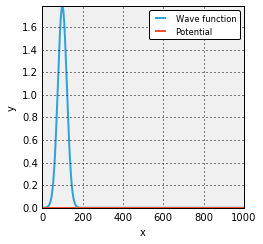

In [510]:
x = np.linspace(0, L, num = int(L/dx))
psi = np.zeros(shape = (int(L/dx), int(T/dt)), dtype=complex)

psi[:, 0] = np.exp(-(x-1)**2/0.2 + 1j*0.1*x)
#psi[:, 0] = np.sin(np.pi*x/L)

#   Normalize wave function
norm_squared = np.sum(dx*np.abs(psi[:, 0])**2)
psi[:, 0] = psi[:, 0]/np.sqrt(norm_squared)

#V = np.vectorize(barrier)(x)

V = np.zeros(shape=x.size)

(hv.Curve(np.abs(psi[:, 0])**2, label='Wave function') * 
  hv.Curve(V, label='Potential'))

In [511]:
H = np.zeros(shape = (int(L/dx), int(L/dx)))

#    Diagonal elements
d = np.diag(1/dx**2 + V)

#    Upper and lower diagonal elements
ud = -np.diag(np.ones(int(L/dx)-1), 1)/(2*dx**2)
ld = -np.diag(np.ones(int(L/dx)-1), -1)/(2*dx**2)
    
H = d + ud + ld

#   Periodic boundary conditions
#H[int(L/dx)-1, 0] = -1/(2*dx**2)
#H[0, int(L/dx)-1] = -1/(2*dx**2)

#   Closed box boundary conditions
H[int(L/dx)-1, 0] = 999999
H[0, int(L/dx)-1] = 999999

#   USE SPARSE HERE
eye = np.eye(len(H))*1j/dt
A = np.linalg.inv(eye - H/2)
B = eye + H/2
C = np.mat(A) * np.mat(B)

In [512]:
#   Main cycle
for i in range(int(T/dt)-1):   
    psi[:, i+1] = C.dot(psi[:, i])

b':HoloMap   [Time]\n   :Curve   [x]   (y)'
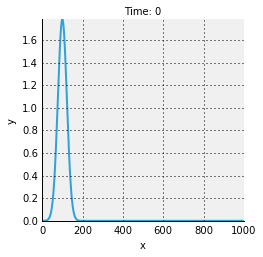
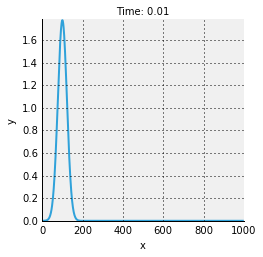
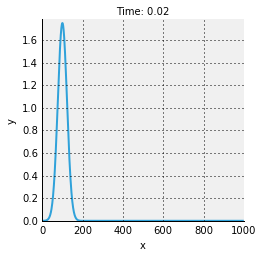
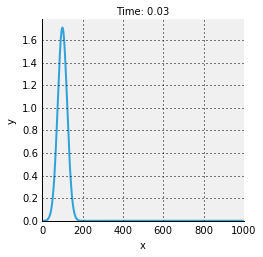
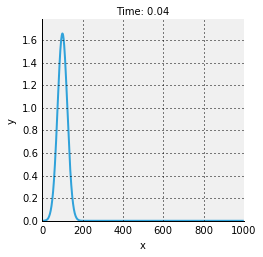
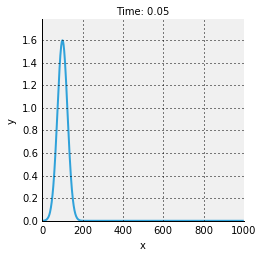
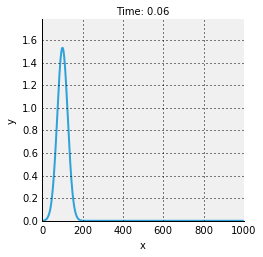
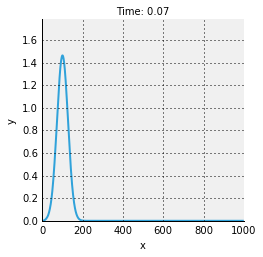
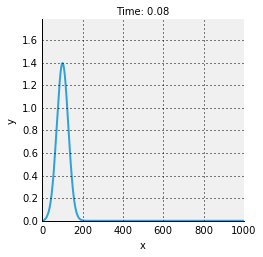
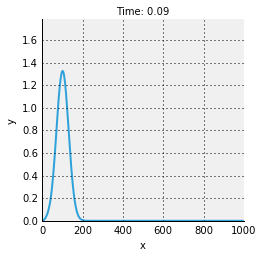
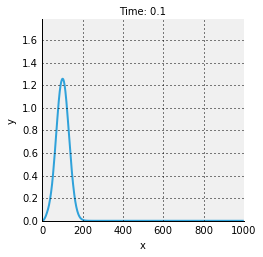
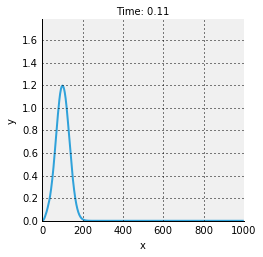
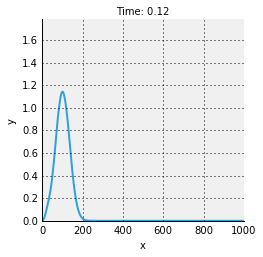
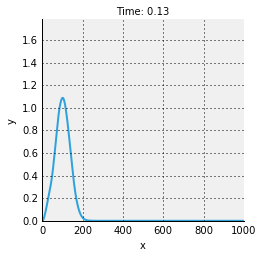
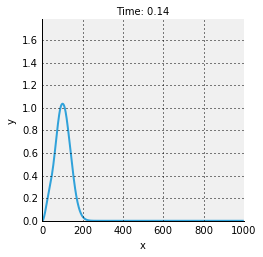
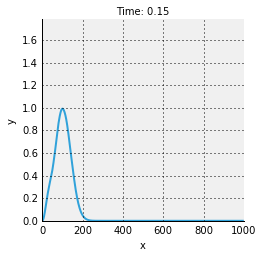
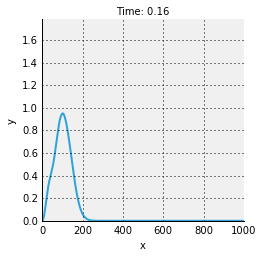
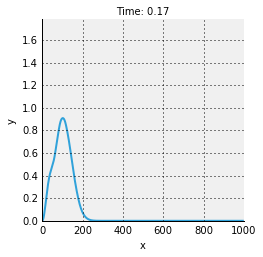
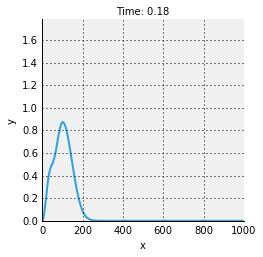
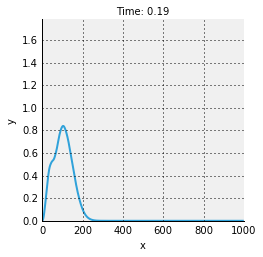
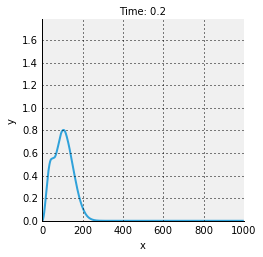
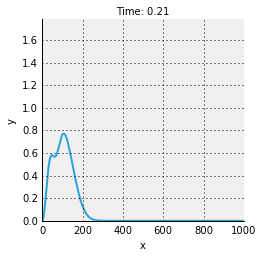
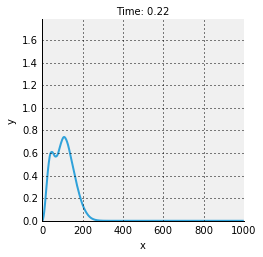
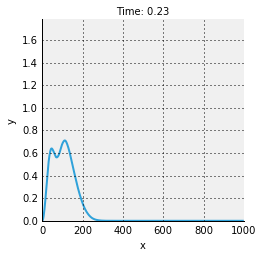
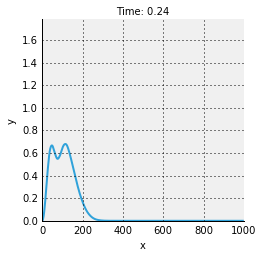
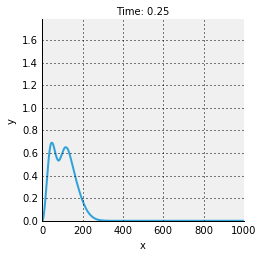
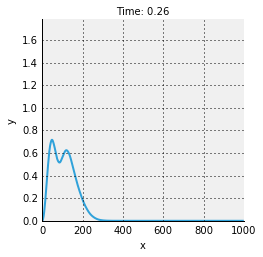
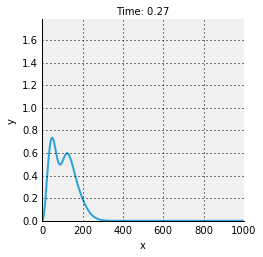
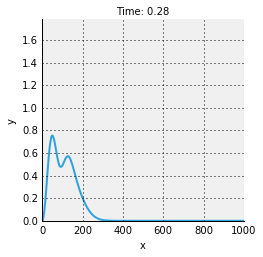
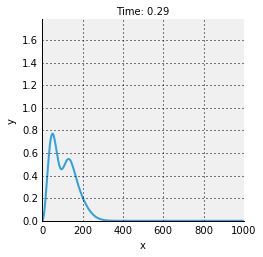
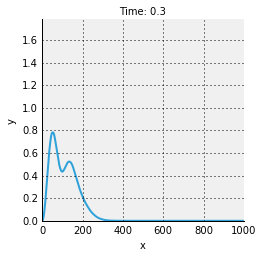
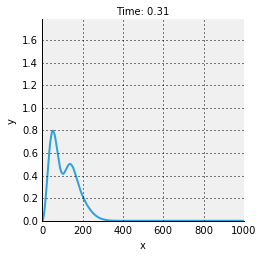
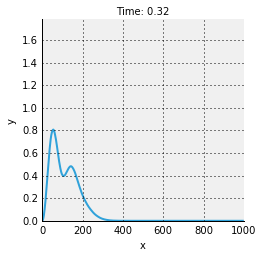
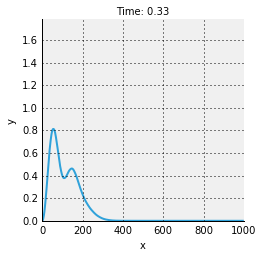
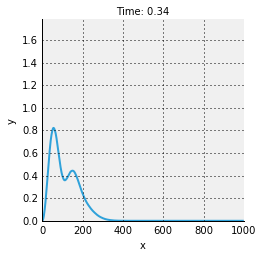
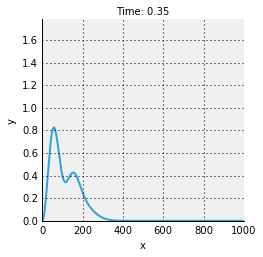
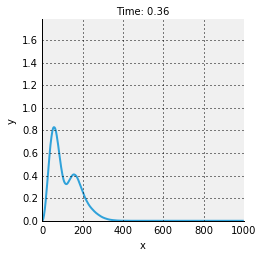
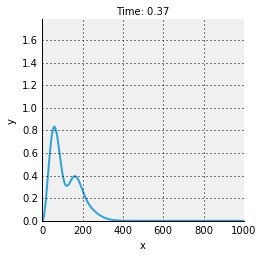
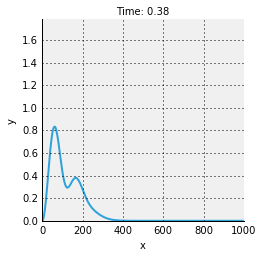
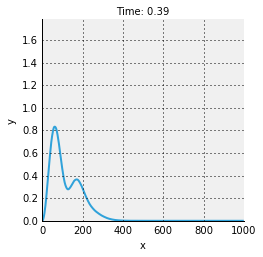
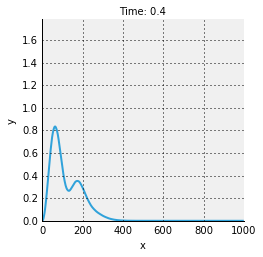
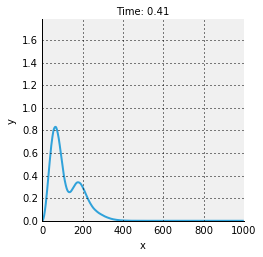
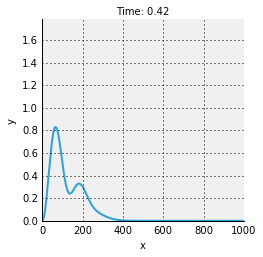
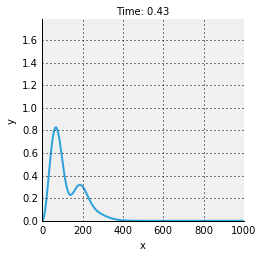
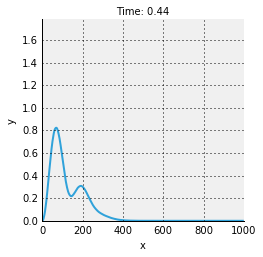
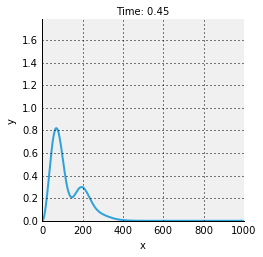
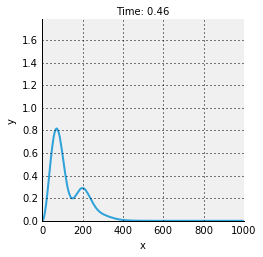
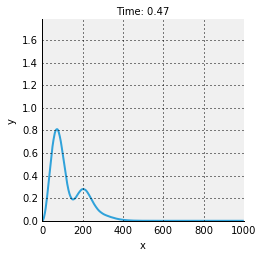
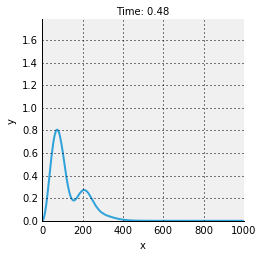
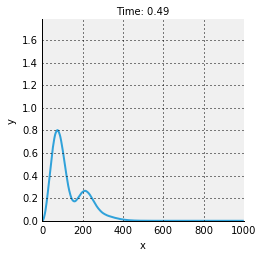
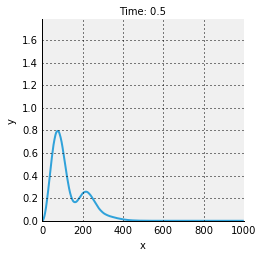
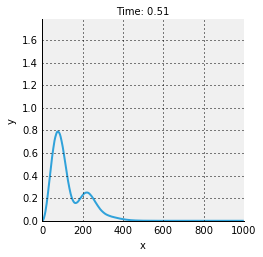
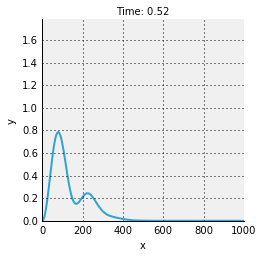
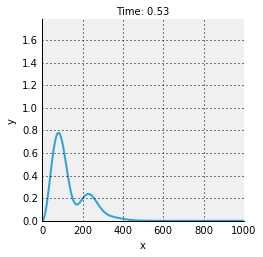
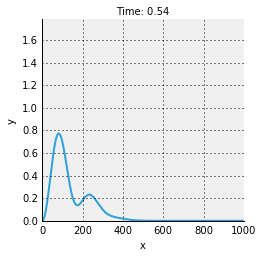
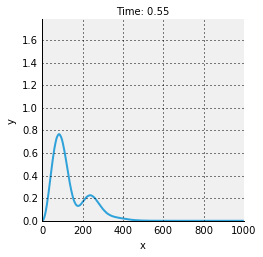
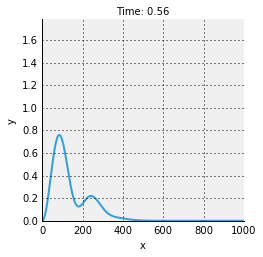
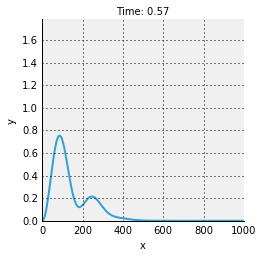
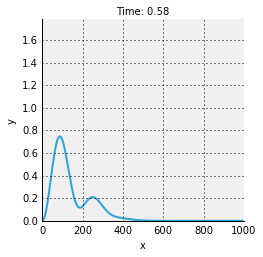
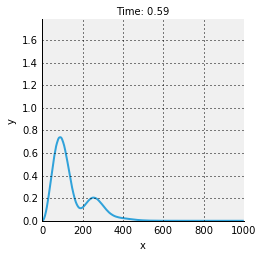
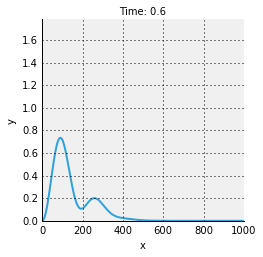
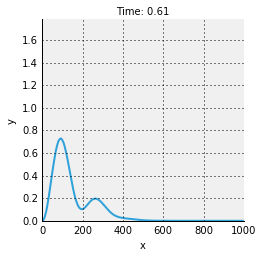
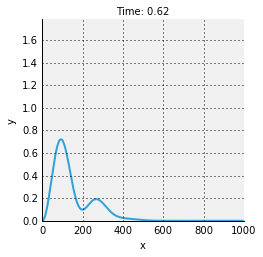
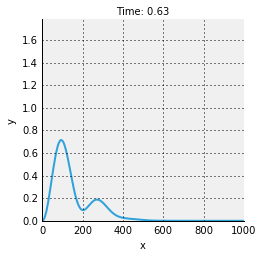
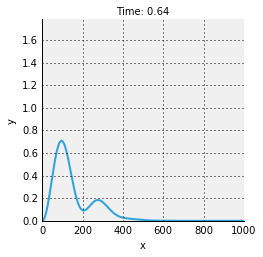
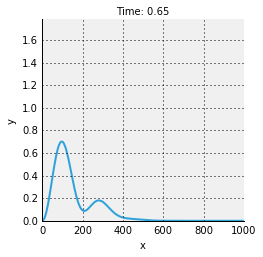
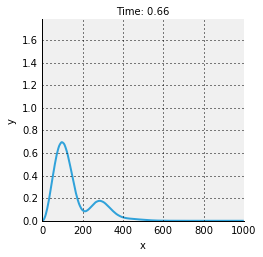
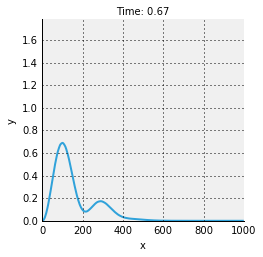
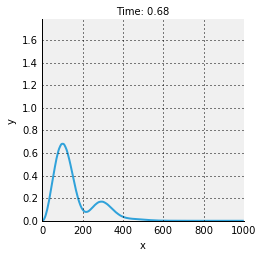
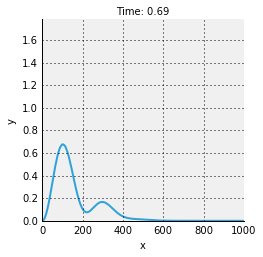
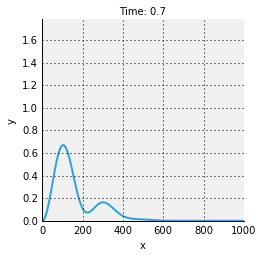
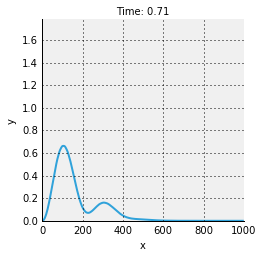
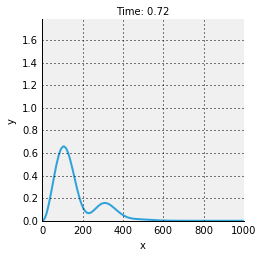
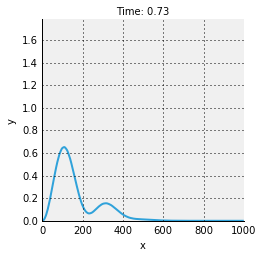
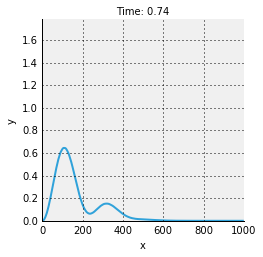
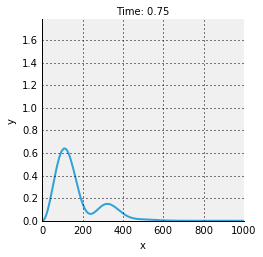
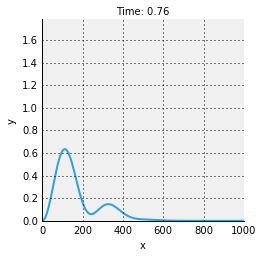
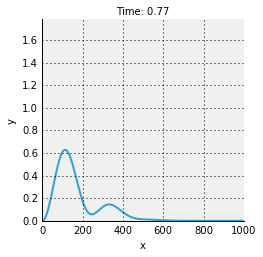
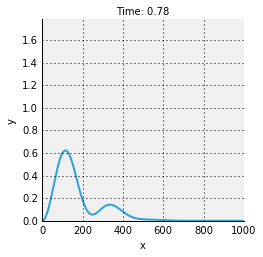
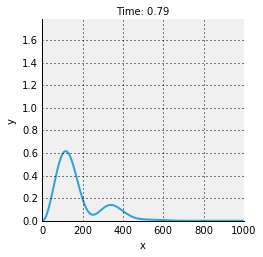
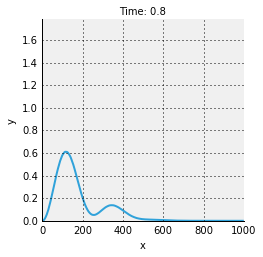
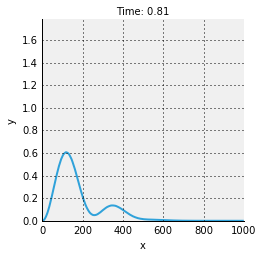
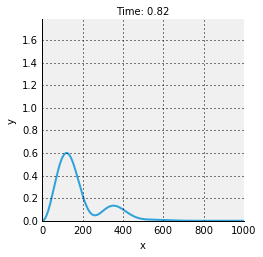
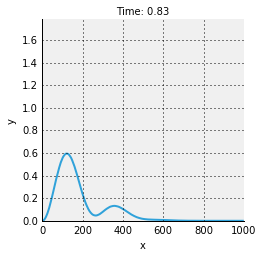
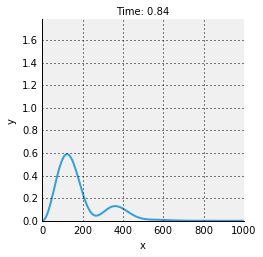
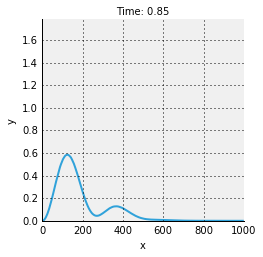
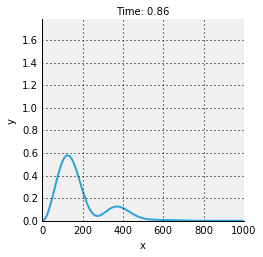
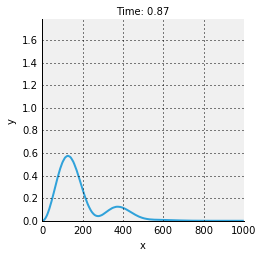
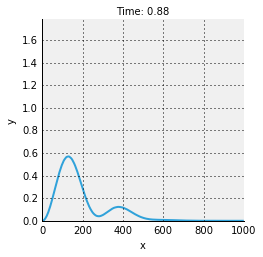
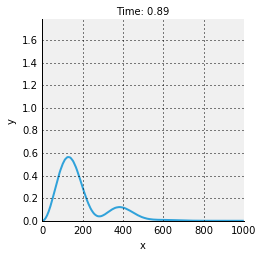
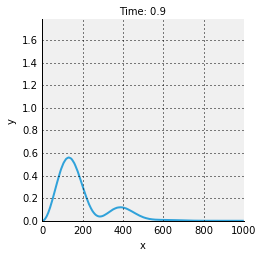
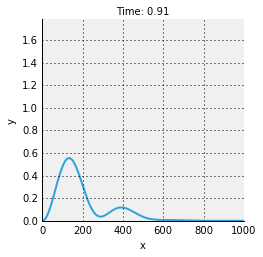
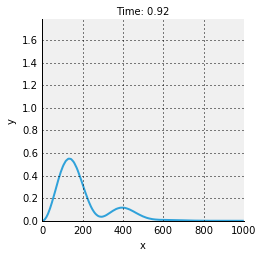
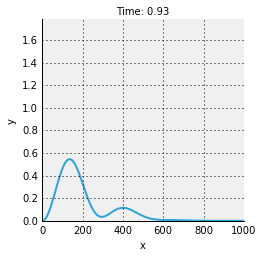
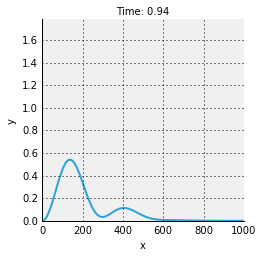
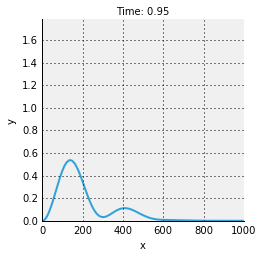
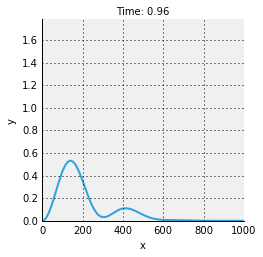
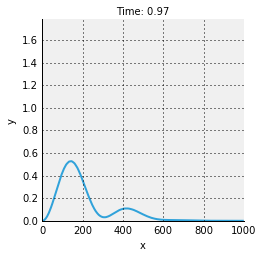
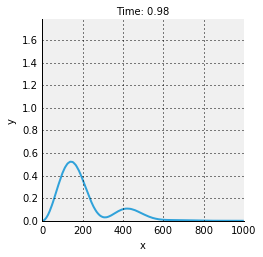
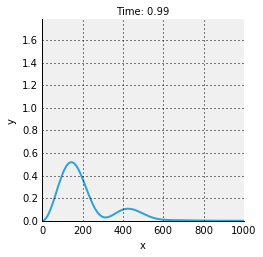
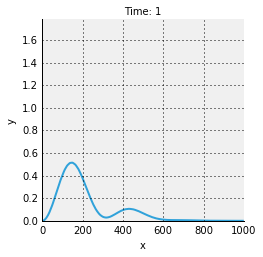
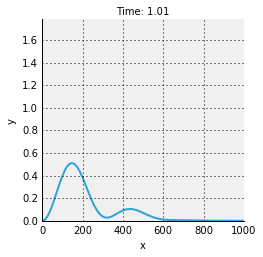
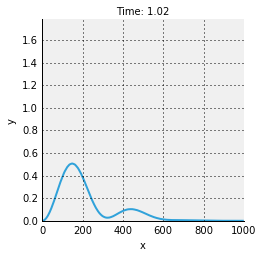
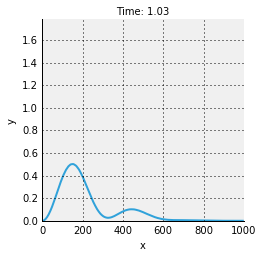
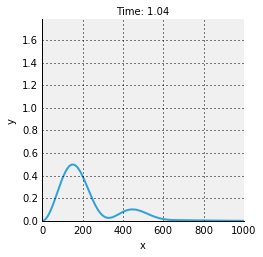
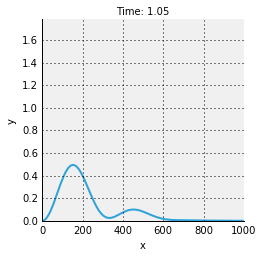
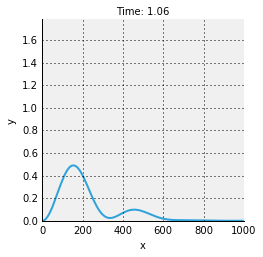
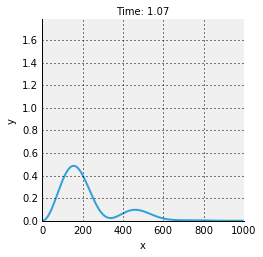
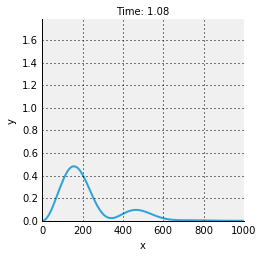
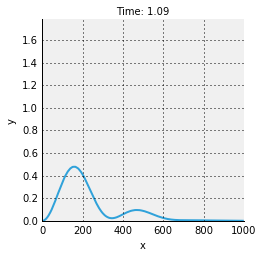
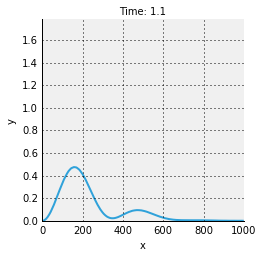
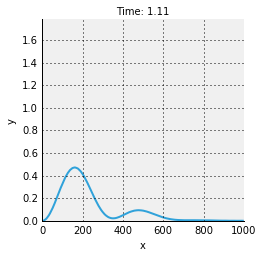
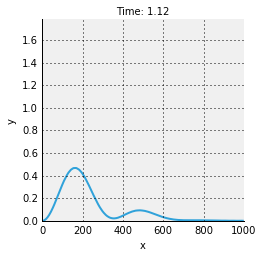
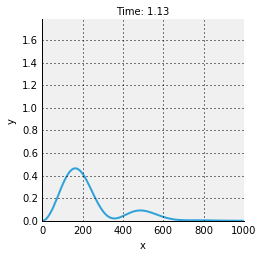
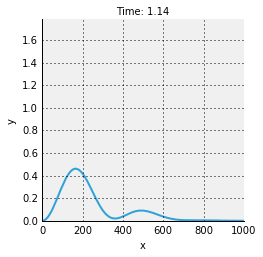
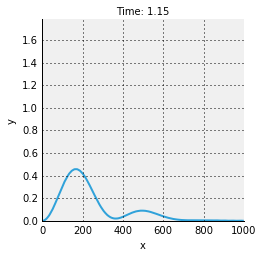
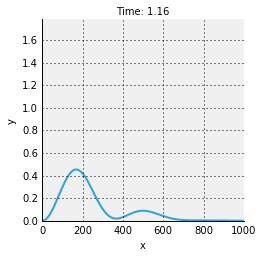
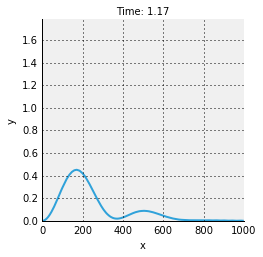
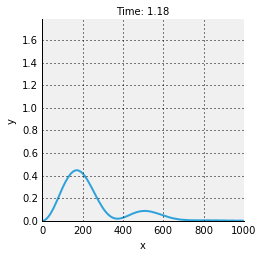
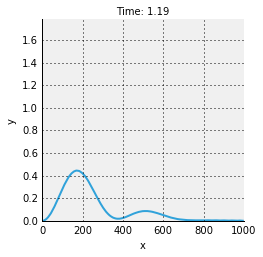
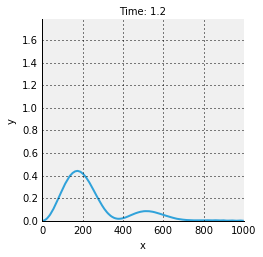
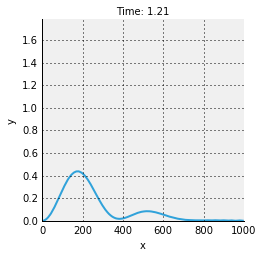
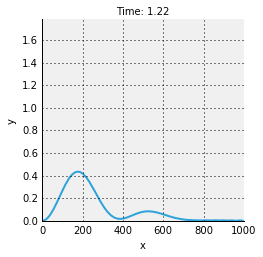
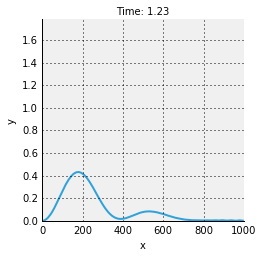
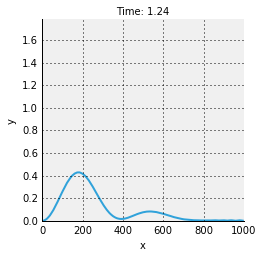
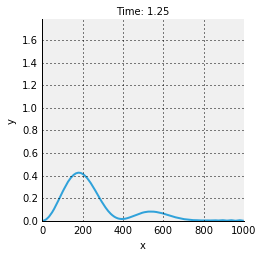
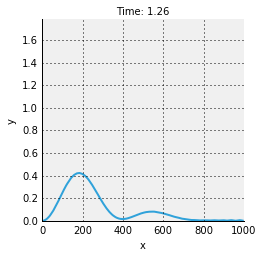
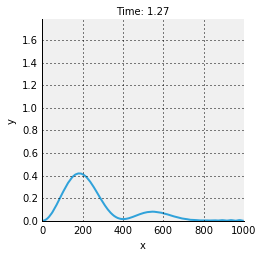
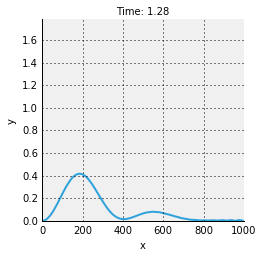
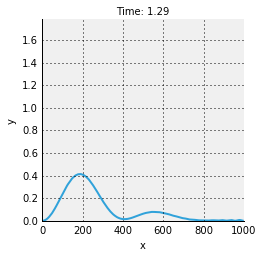
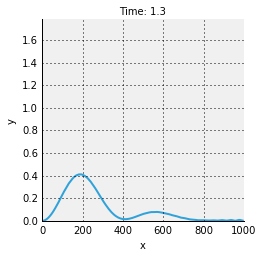
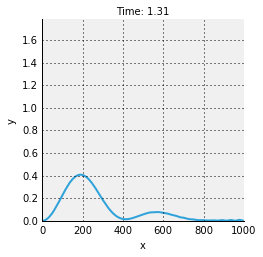
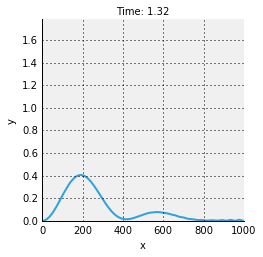
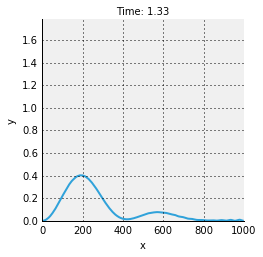
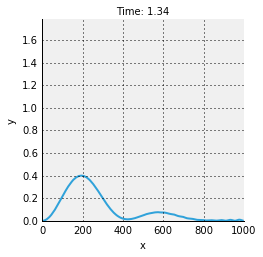
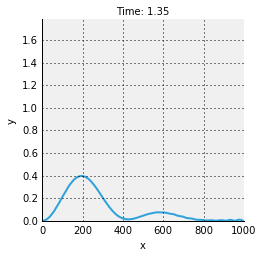
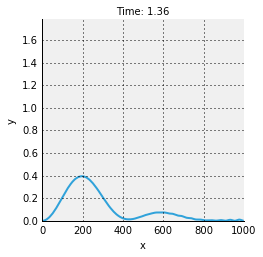
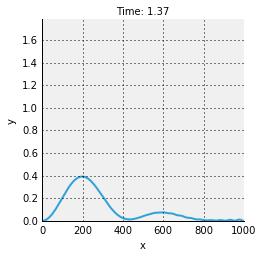
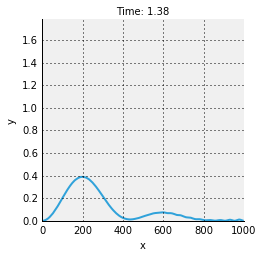
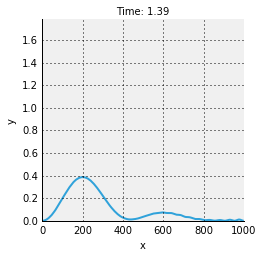
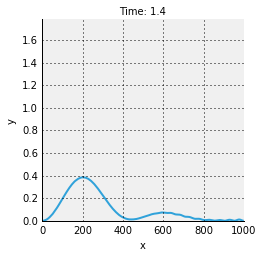
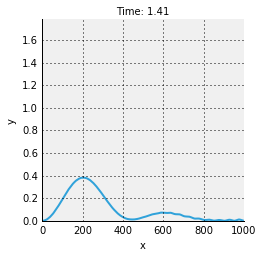
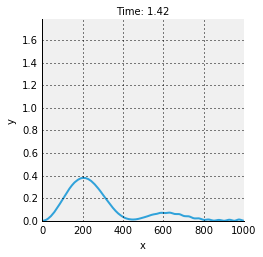
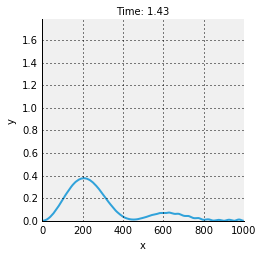
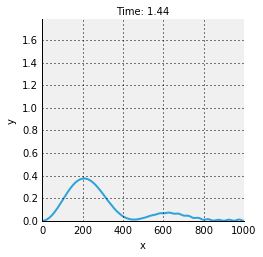
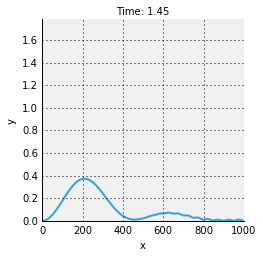
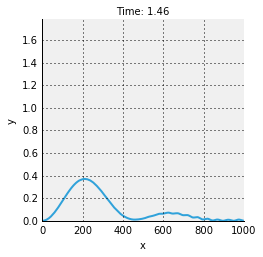
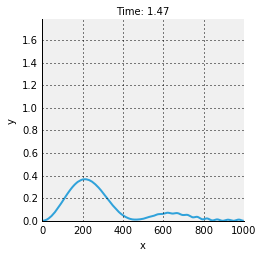
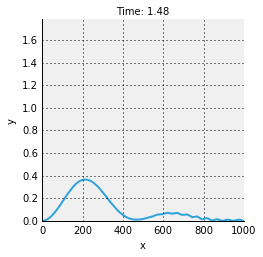
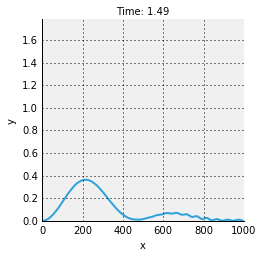
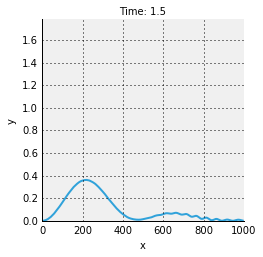
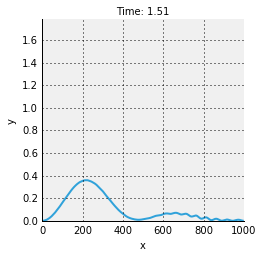
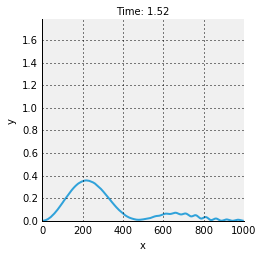
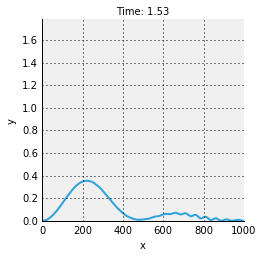
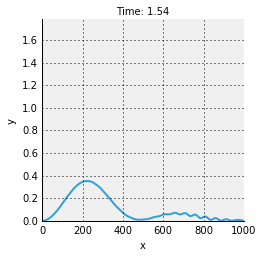
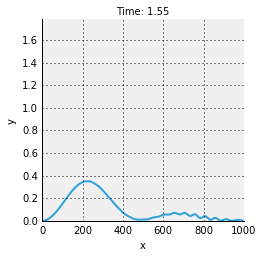
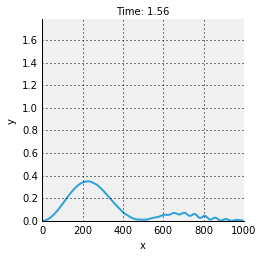
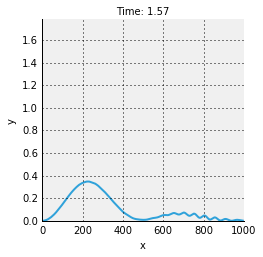
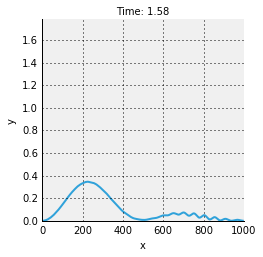
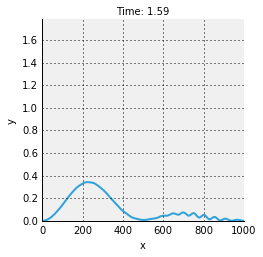
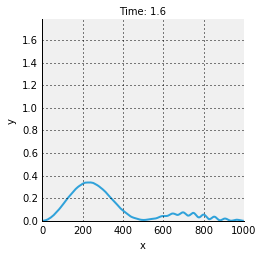
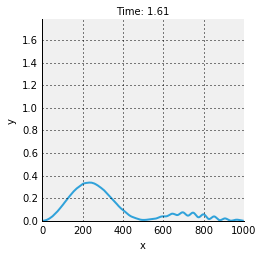
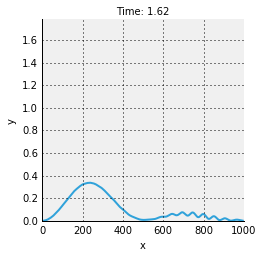
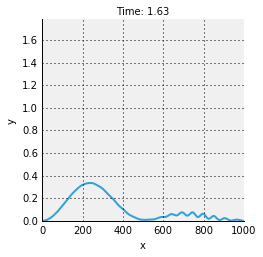
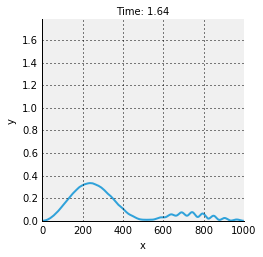
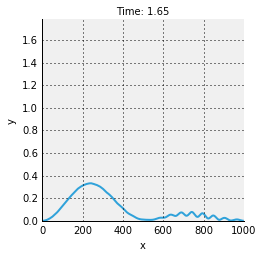
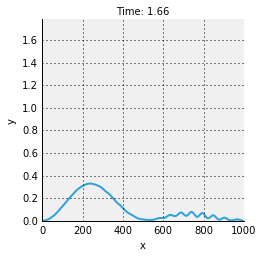
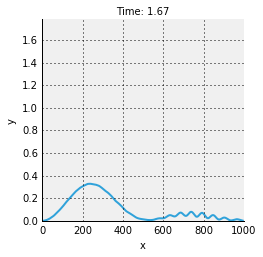
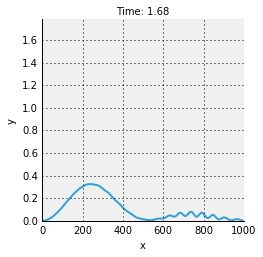
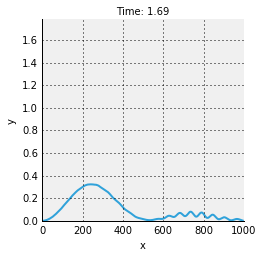
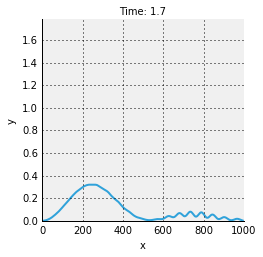
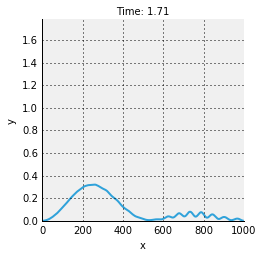
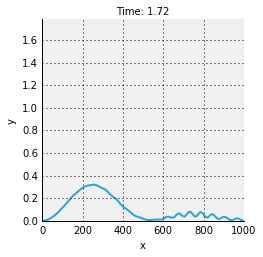
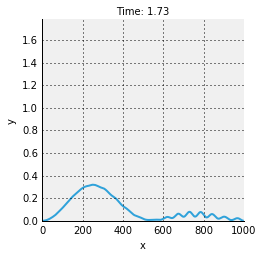
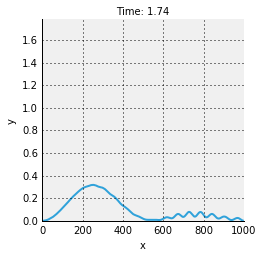
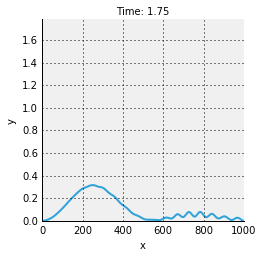
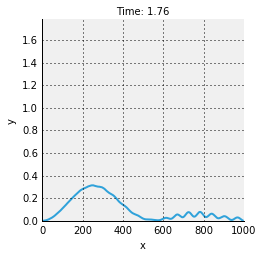
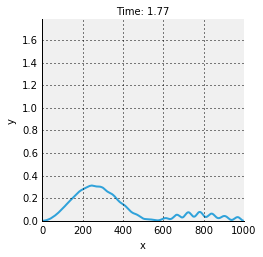
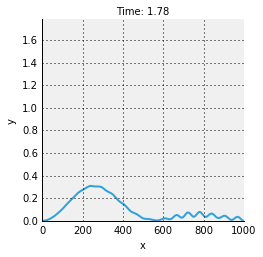
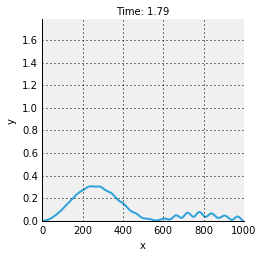
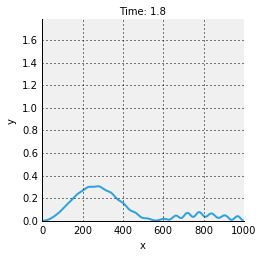
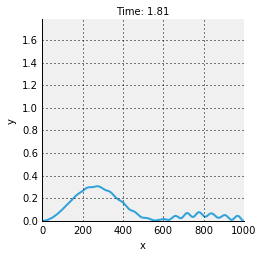
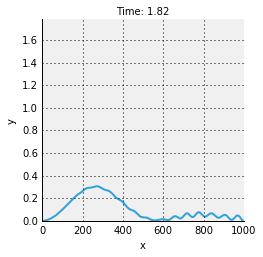
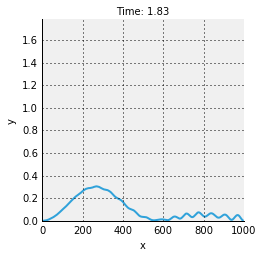
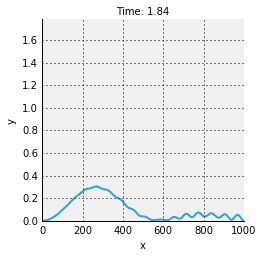
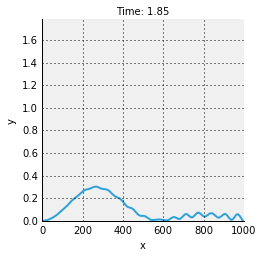
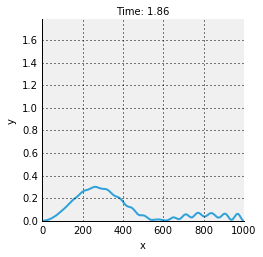
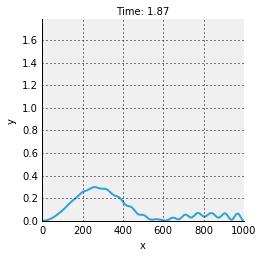
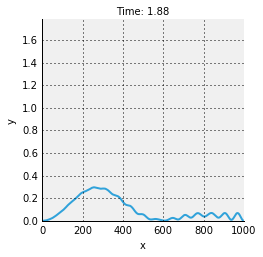
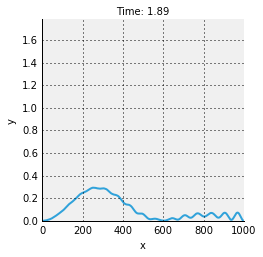
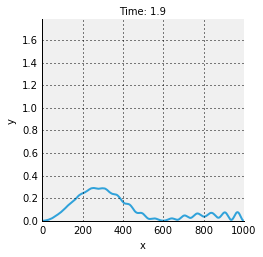
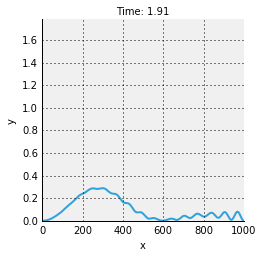
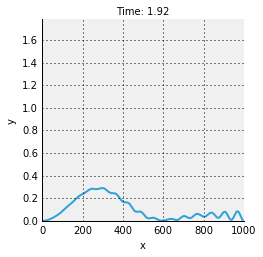
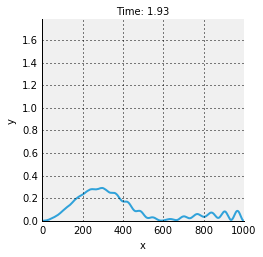
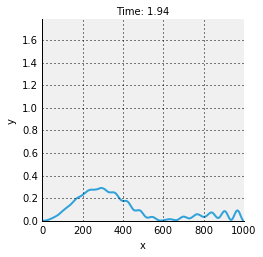
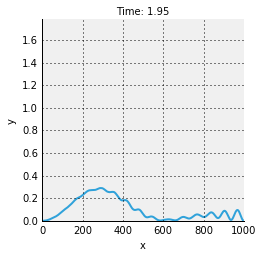
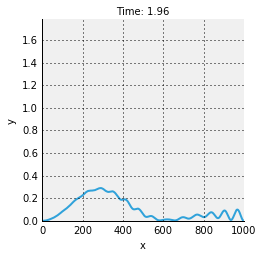
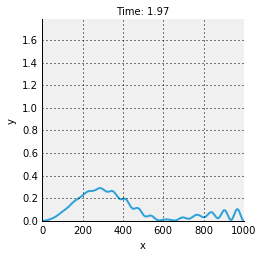
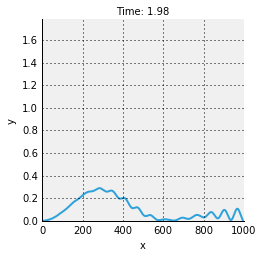
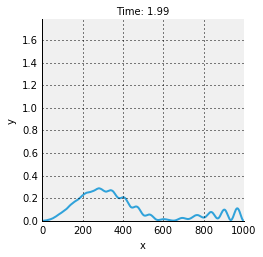
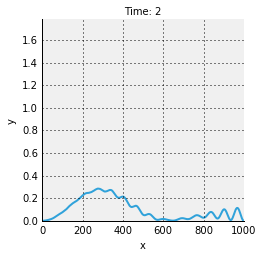
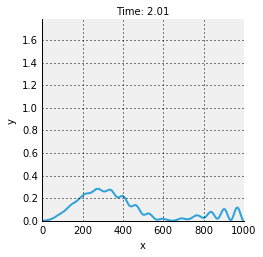
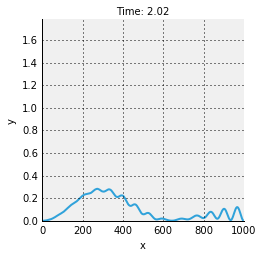
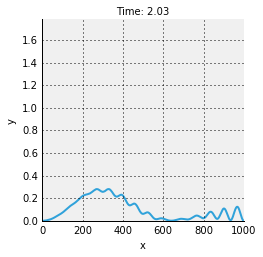
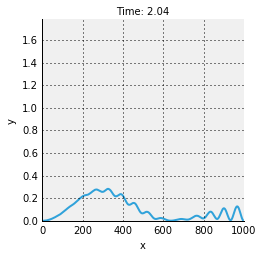
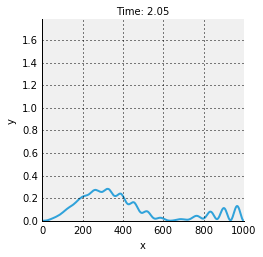
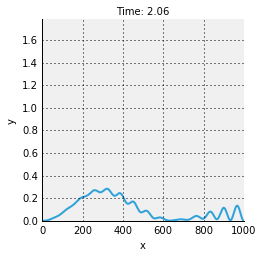
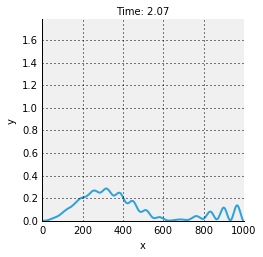
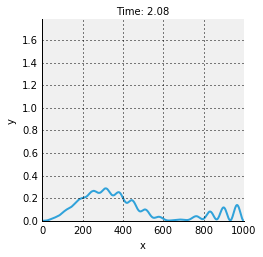
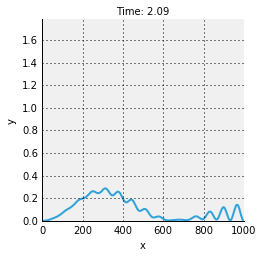
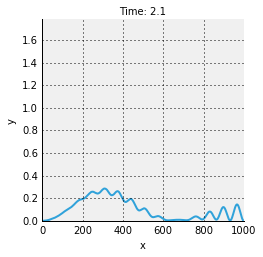
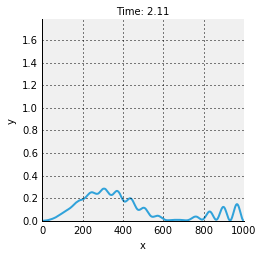
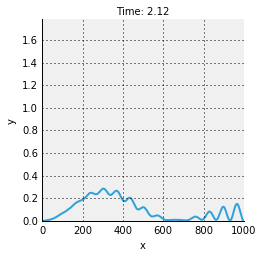
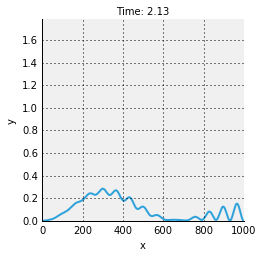
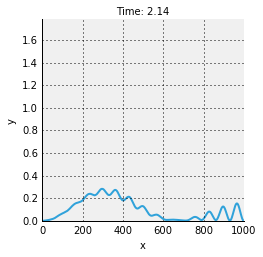
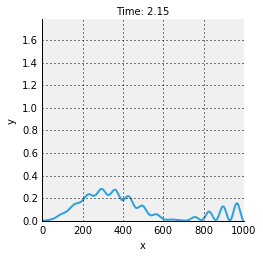
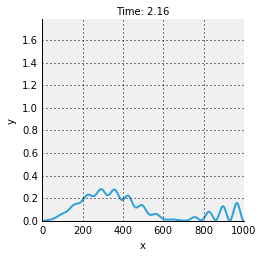
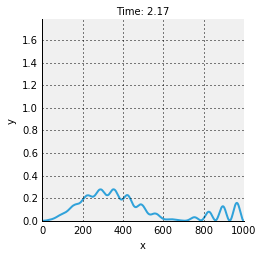
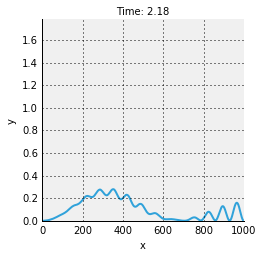
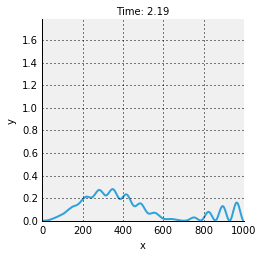
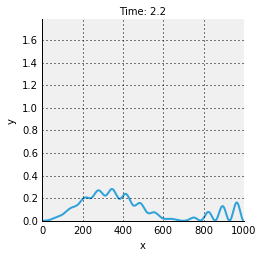
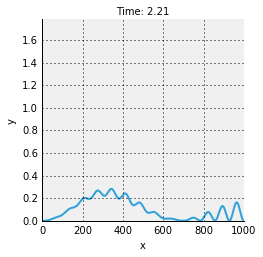
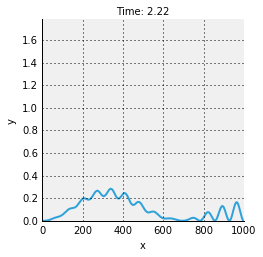
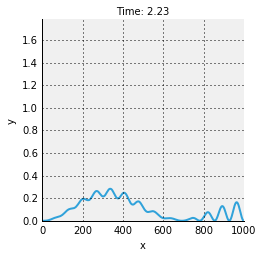
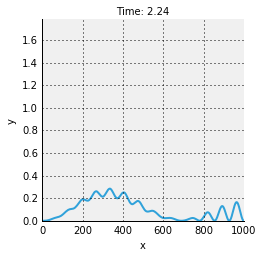
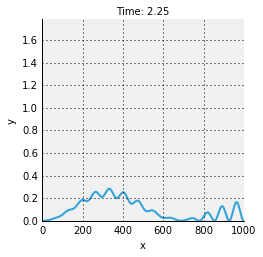
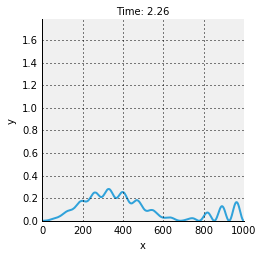
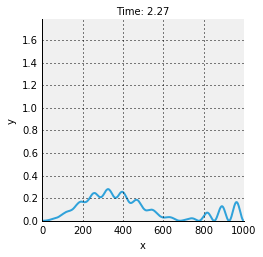
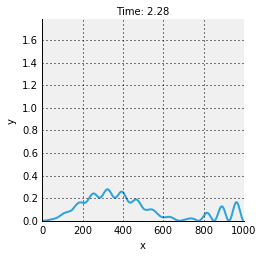
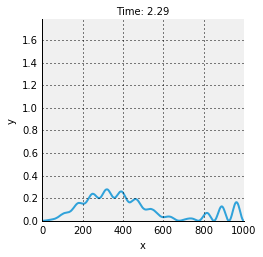
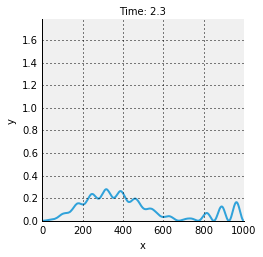
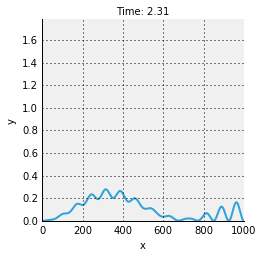
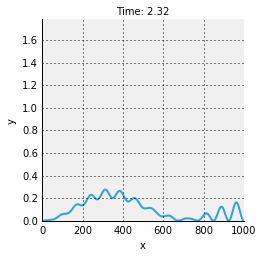
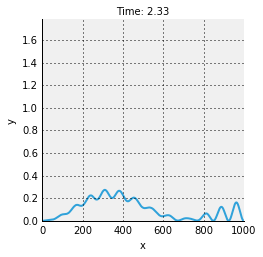
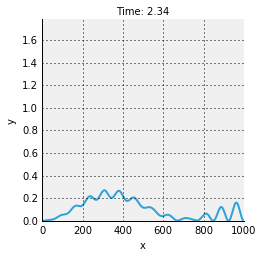
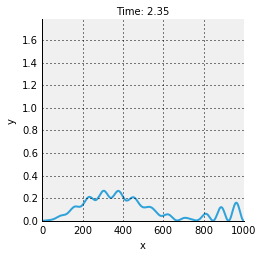
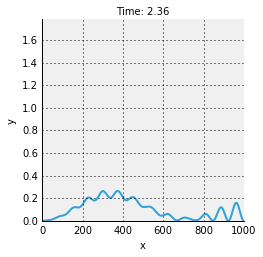
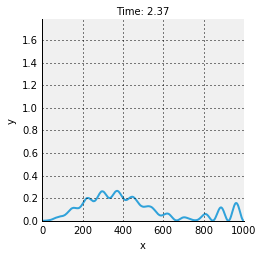
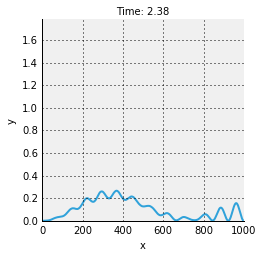
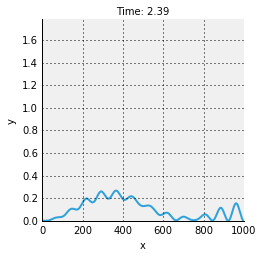
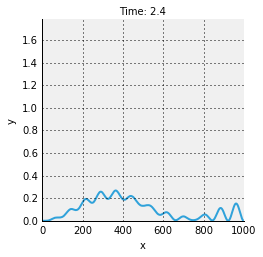
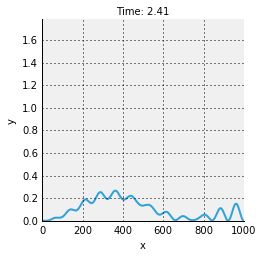
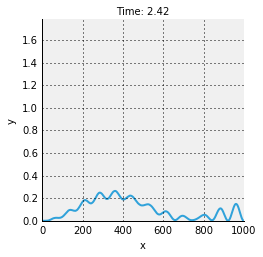
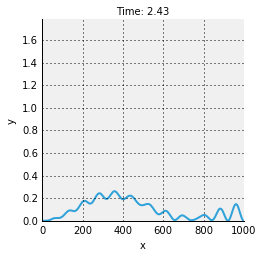
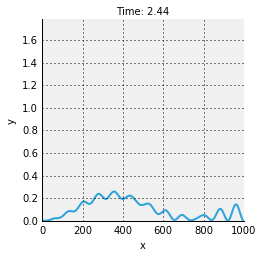
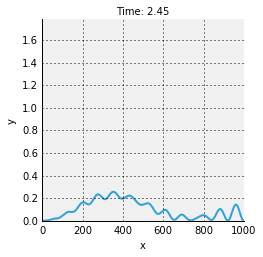
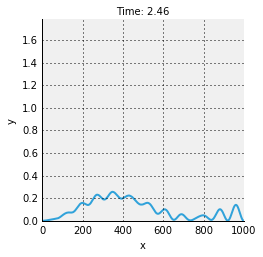
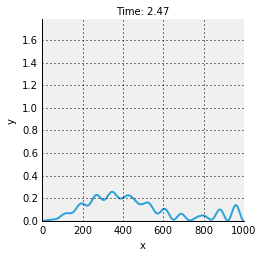
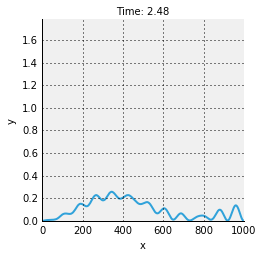
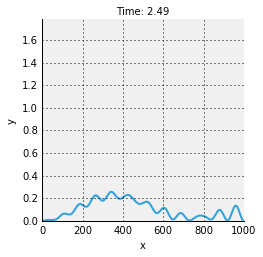
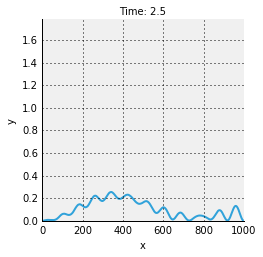
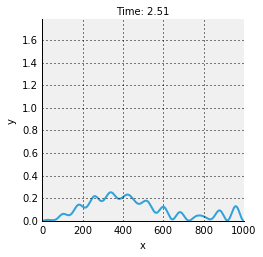
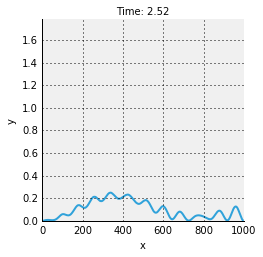
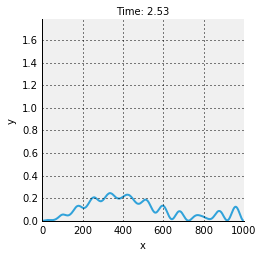
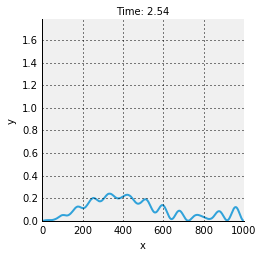
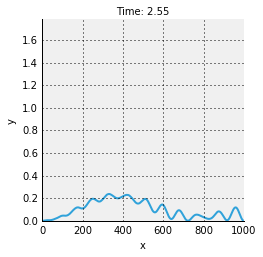
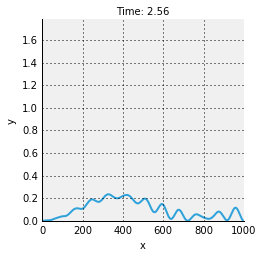
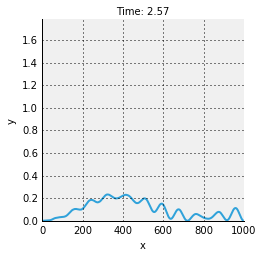
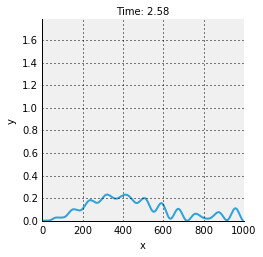
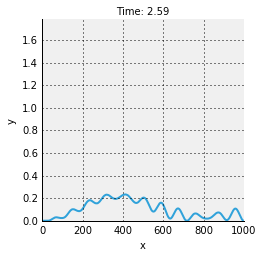
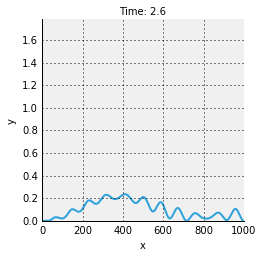
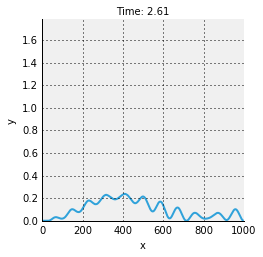
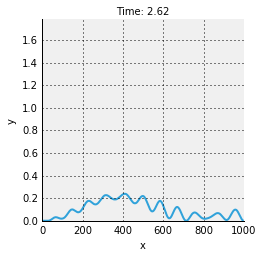
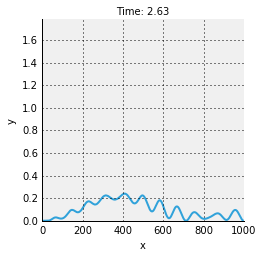
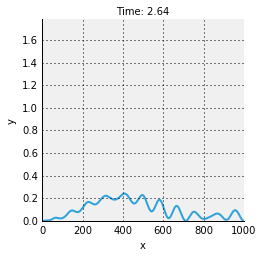
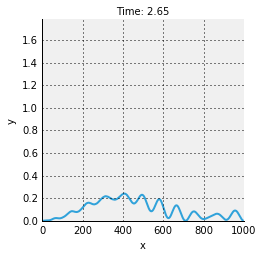
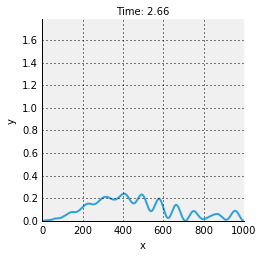
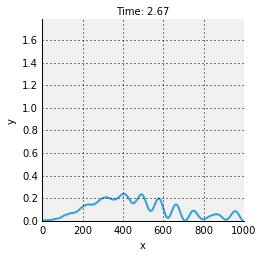
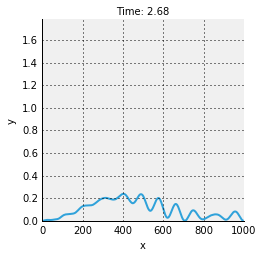
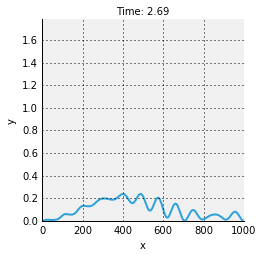
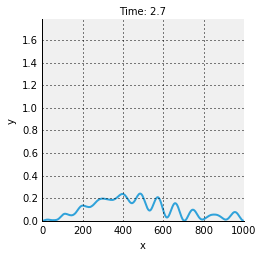
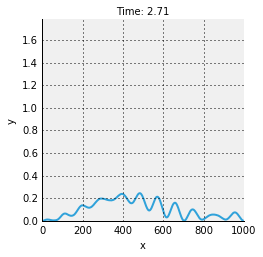
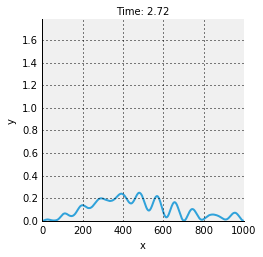
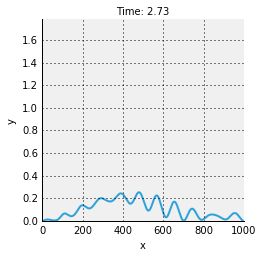
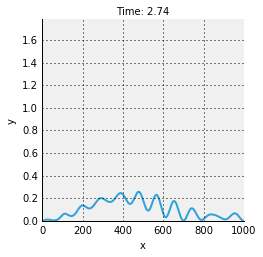
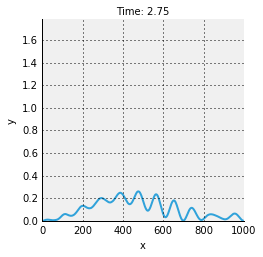
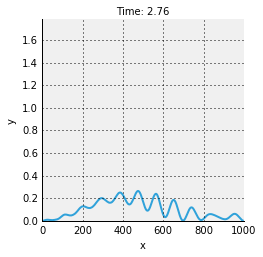
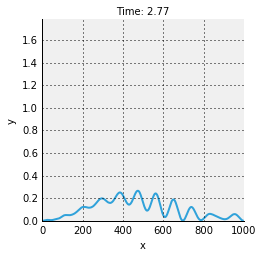
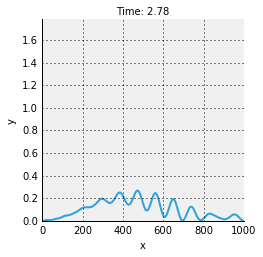
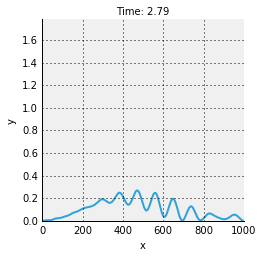
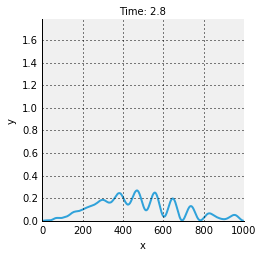
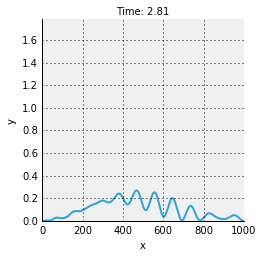
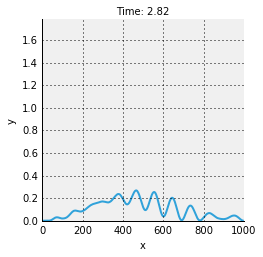
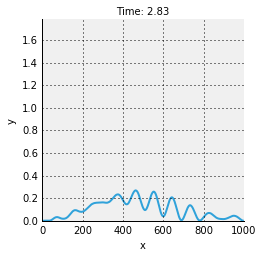
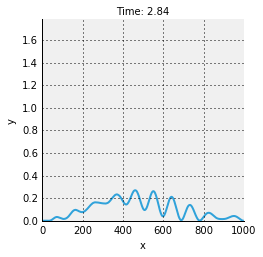
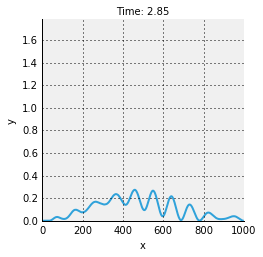
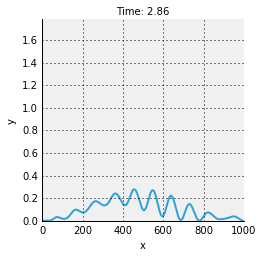
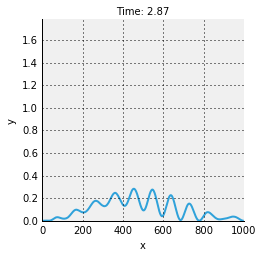
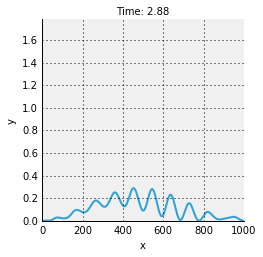
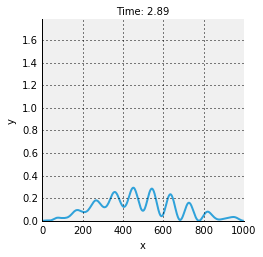
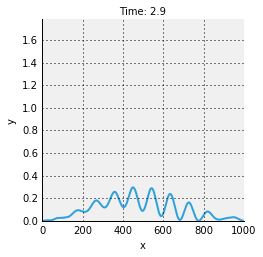
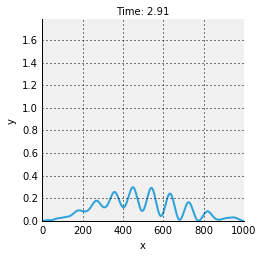
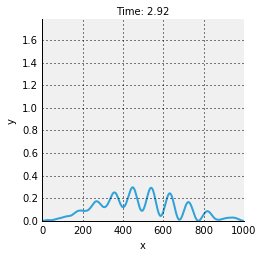
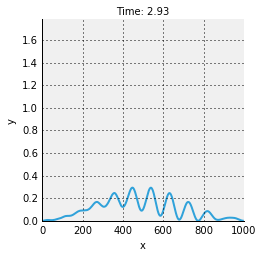
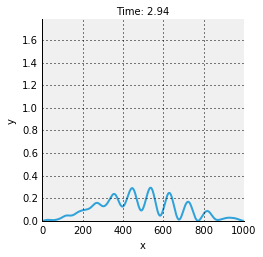
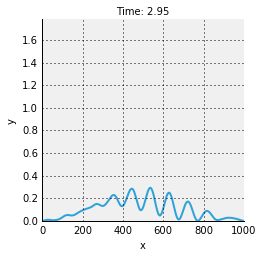
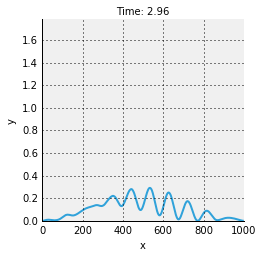
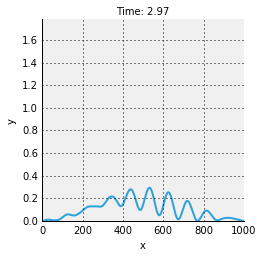
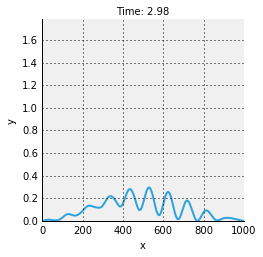
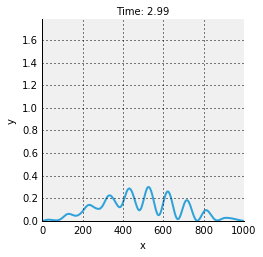
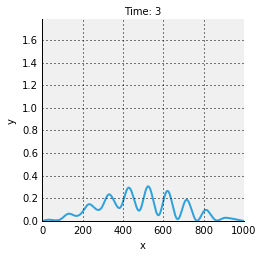
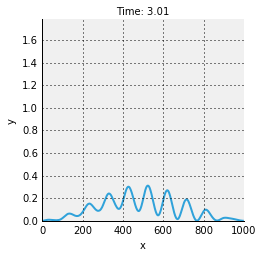
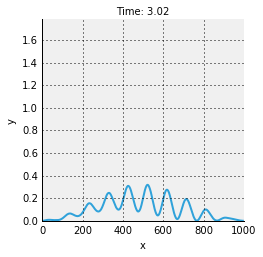
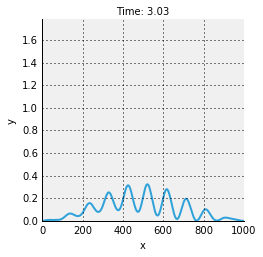
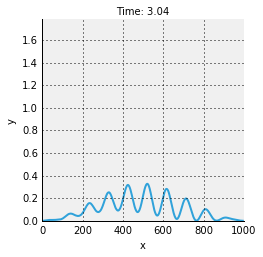
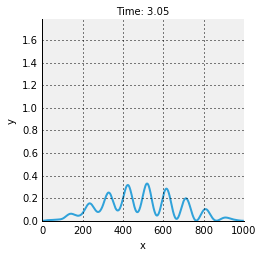
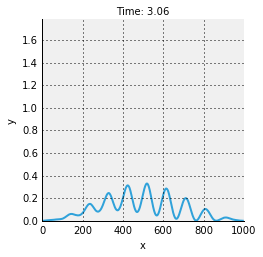
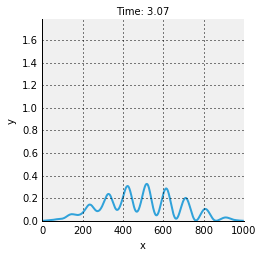
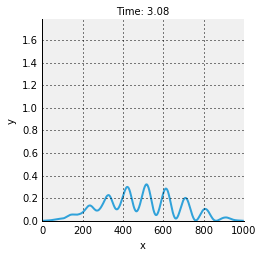
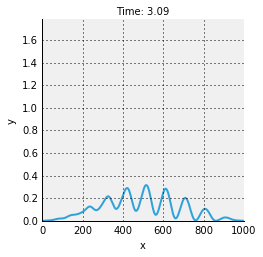
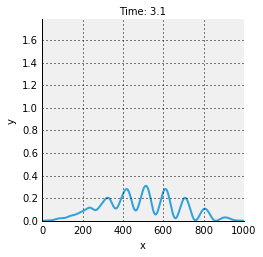
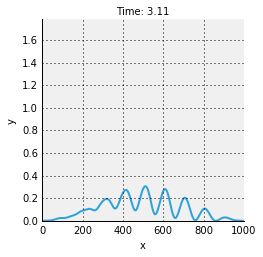
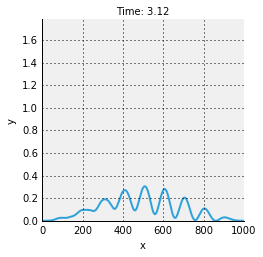
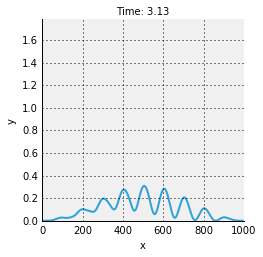
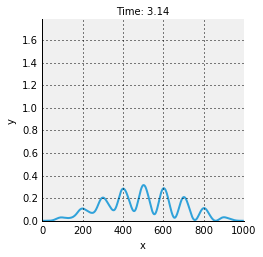
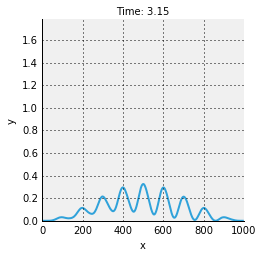
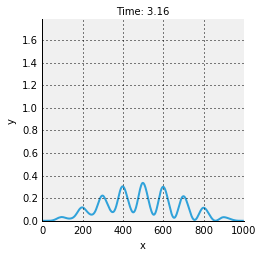
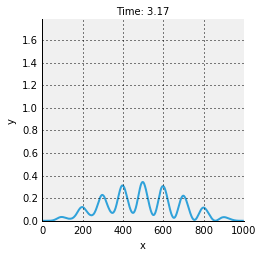
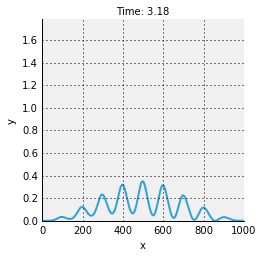
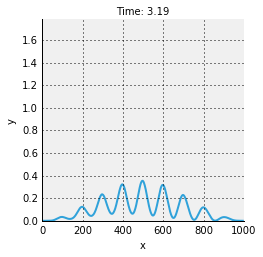
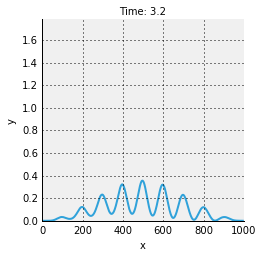
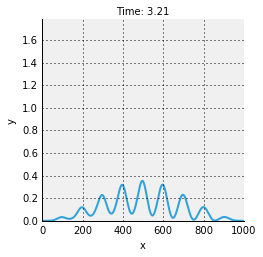
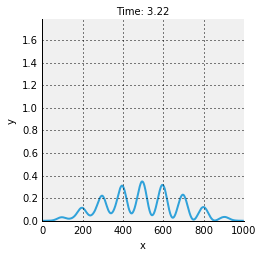
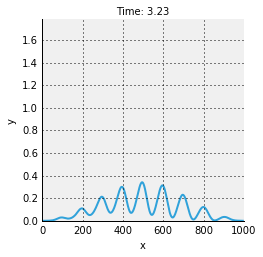
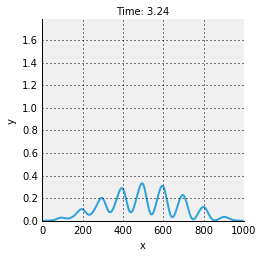
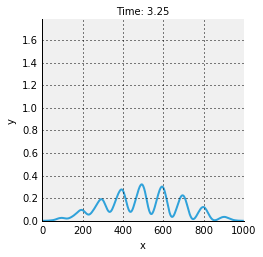
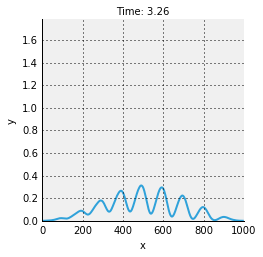
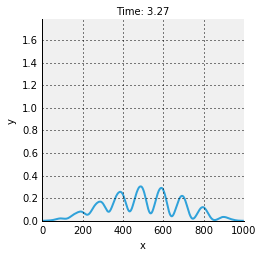
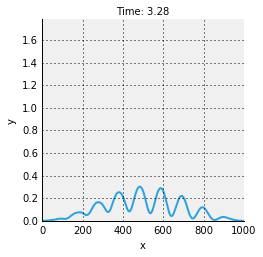
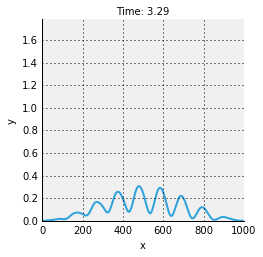
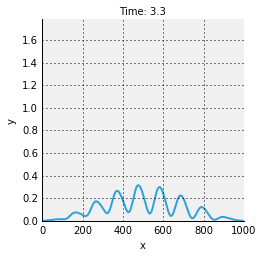
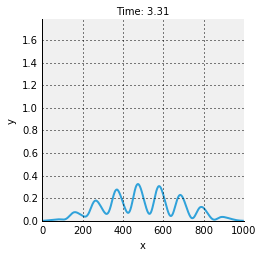
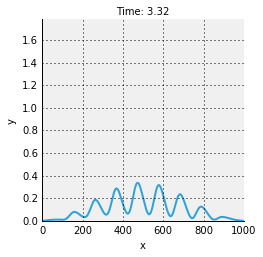
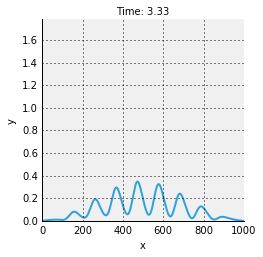
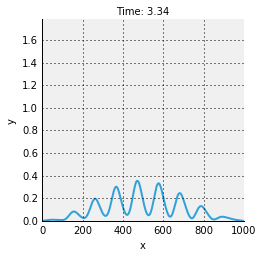
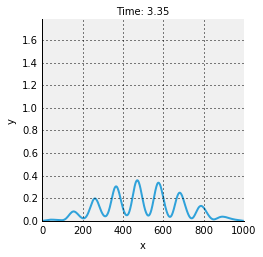
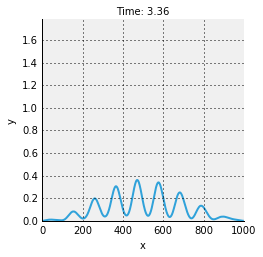
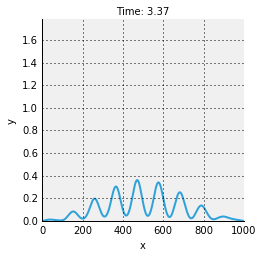
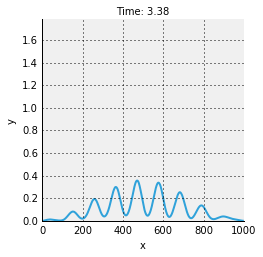
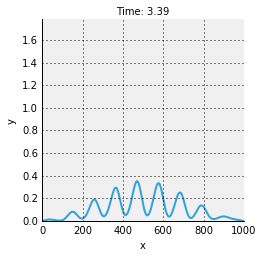
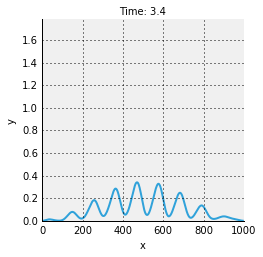
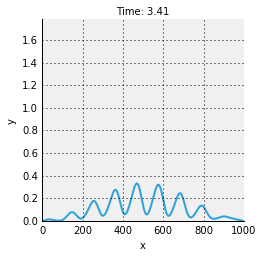
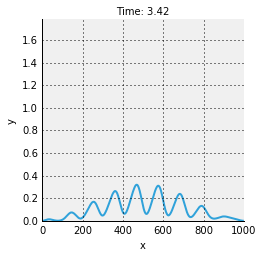
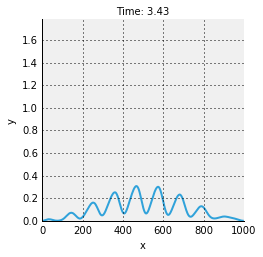
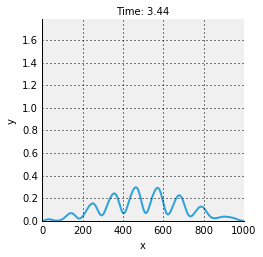
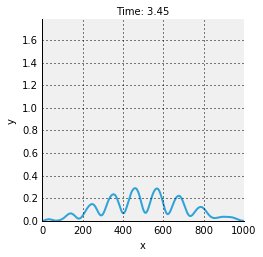
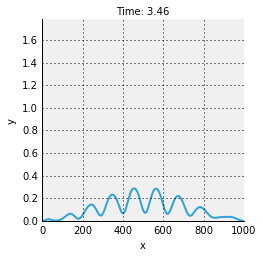
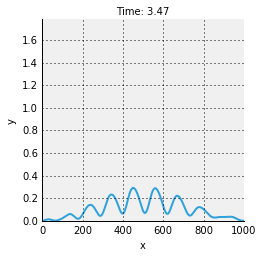
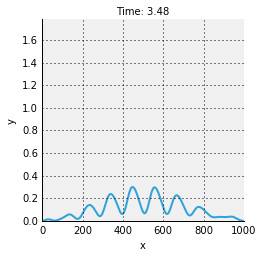
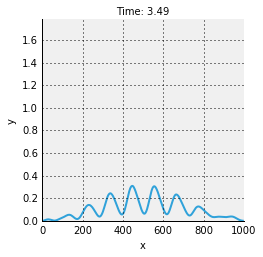
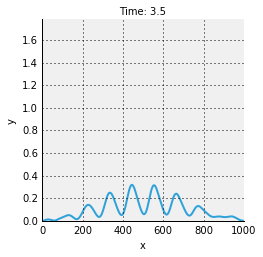
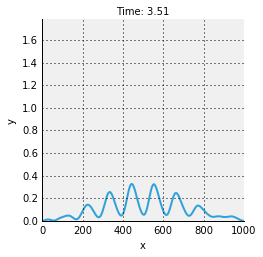
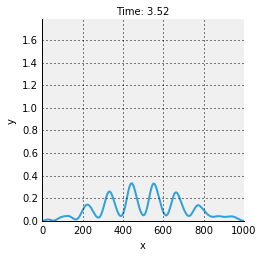
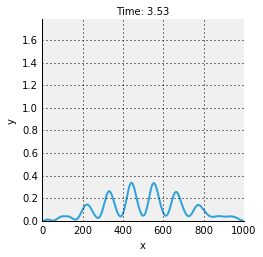
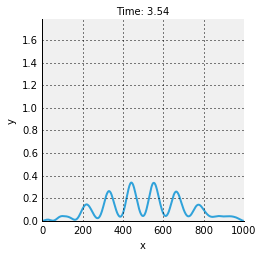
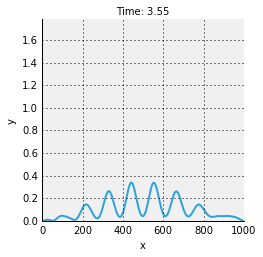
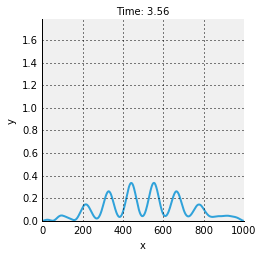
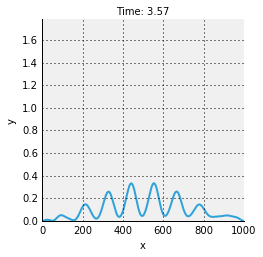
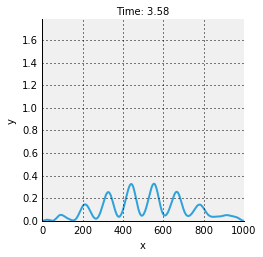
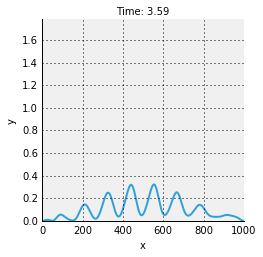
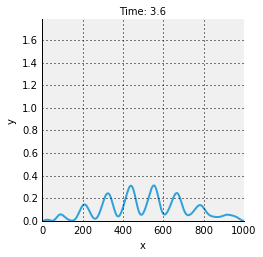
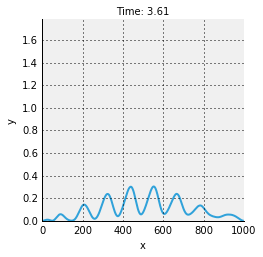
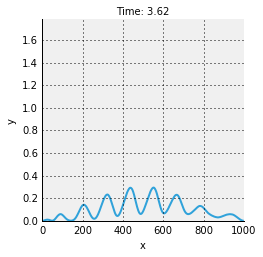
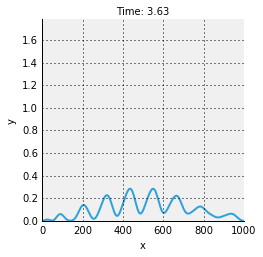
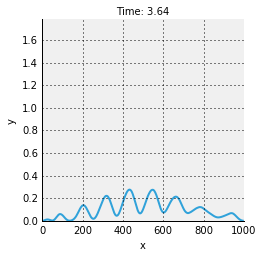
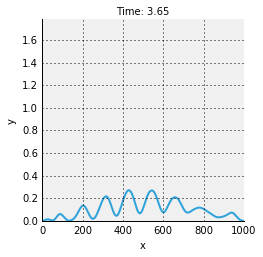
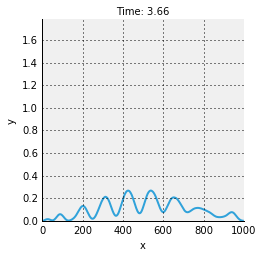
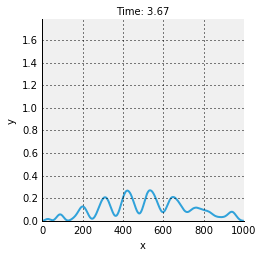
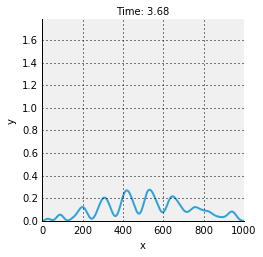
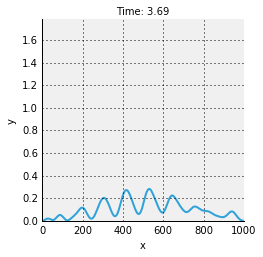
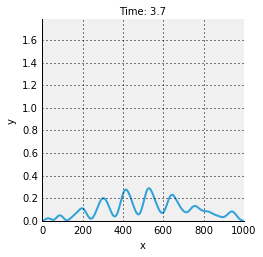
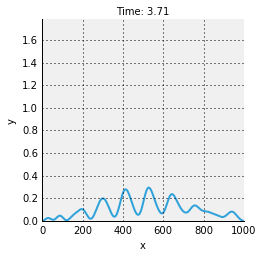
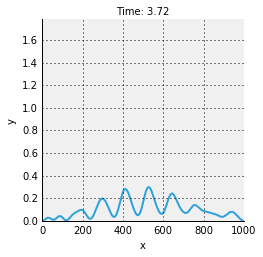
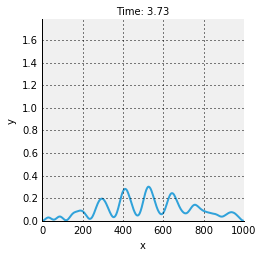
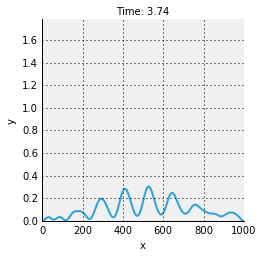
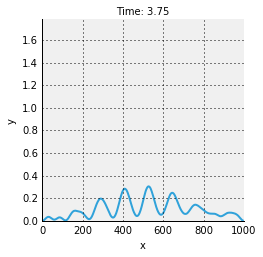
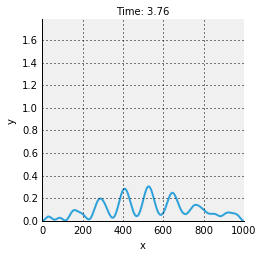
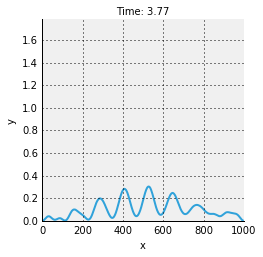
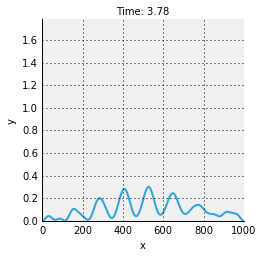
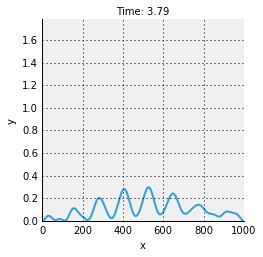
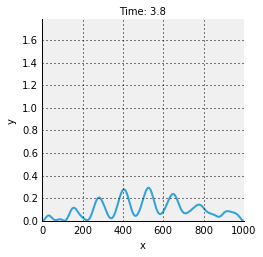
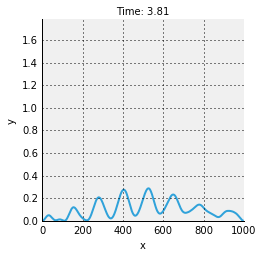
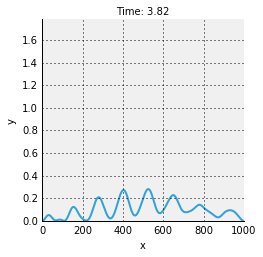
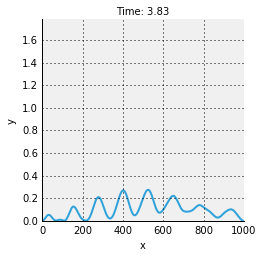
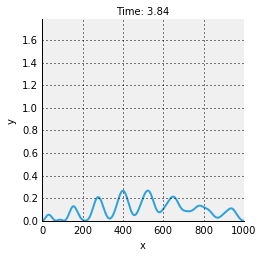
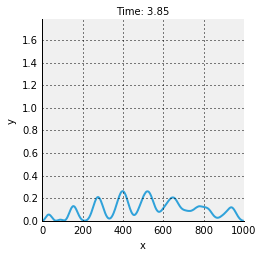
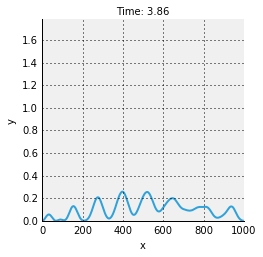
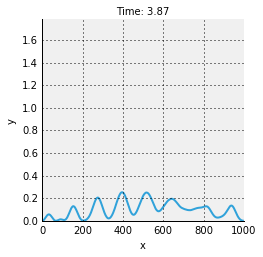
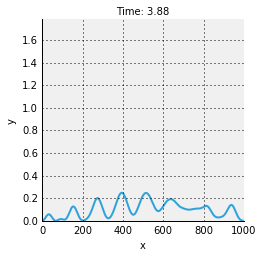
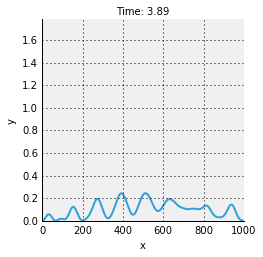
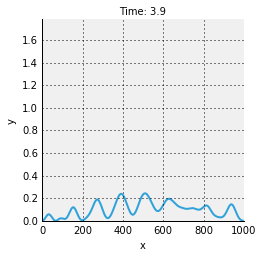
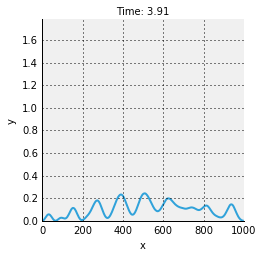
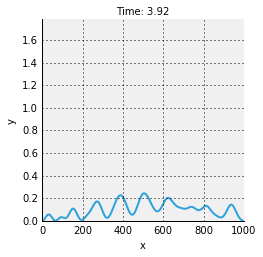
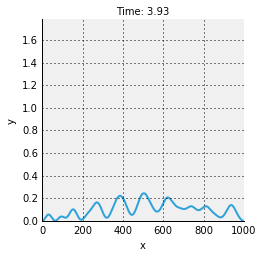
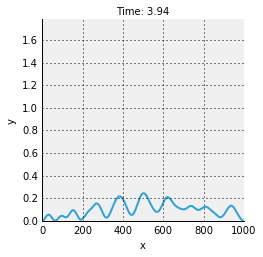
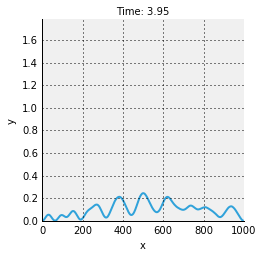
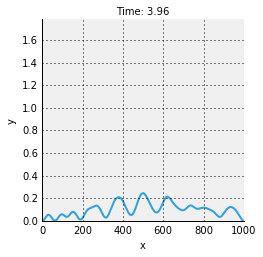
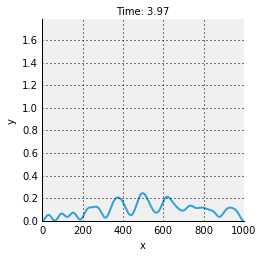
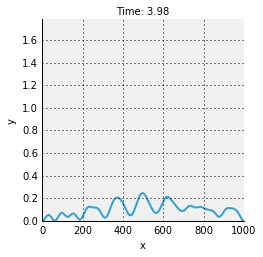
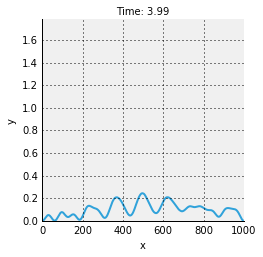
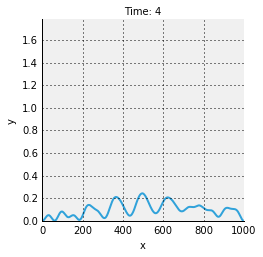
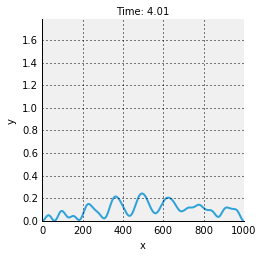
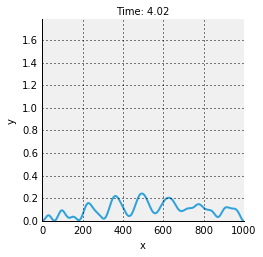
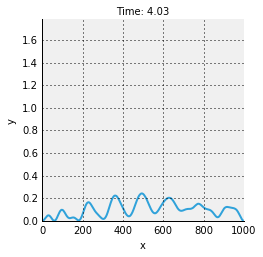
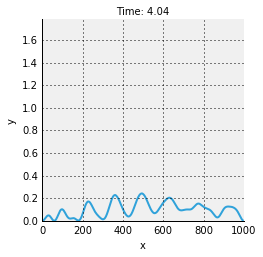
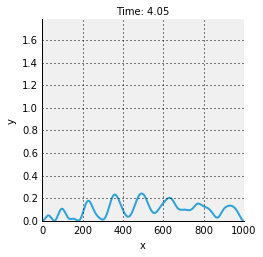
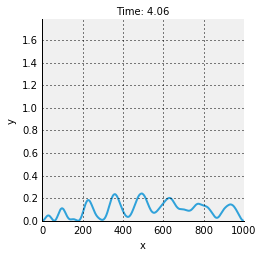
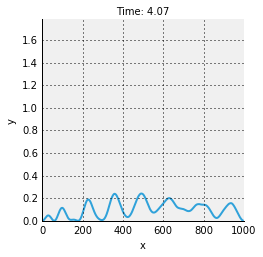
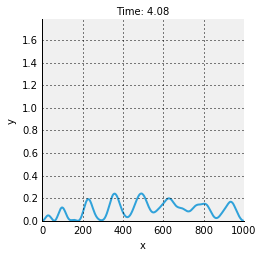
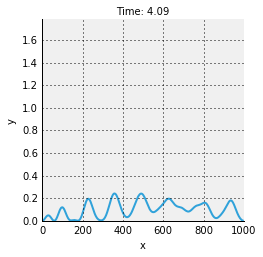
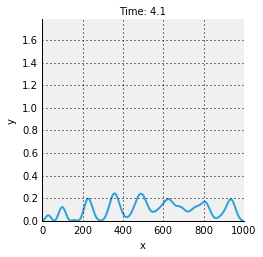
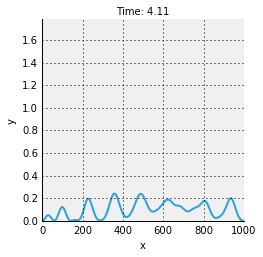
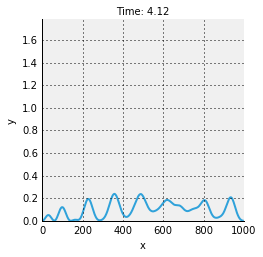
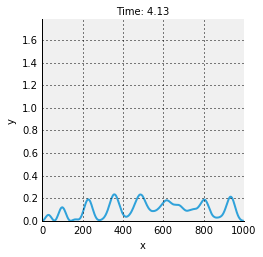
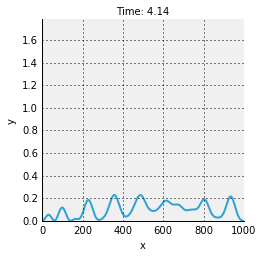
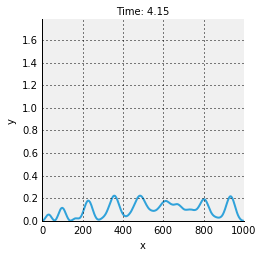
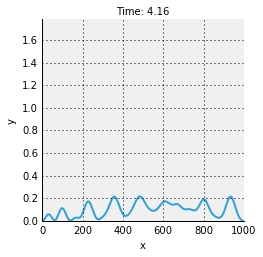
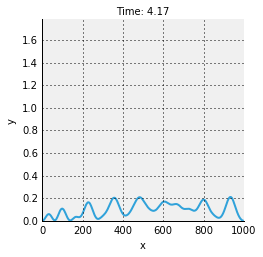
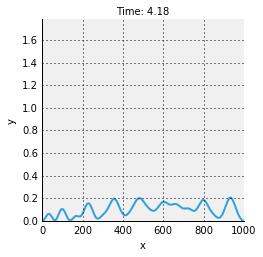
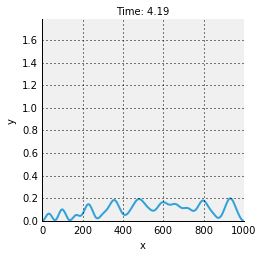
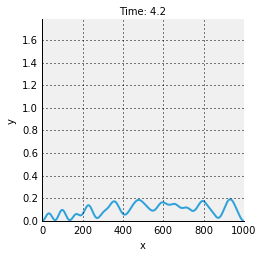
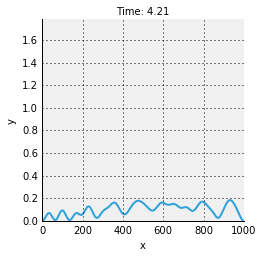
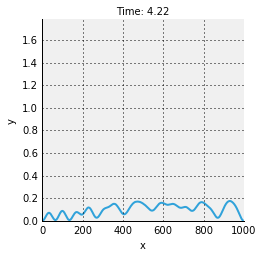
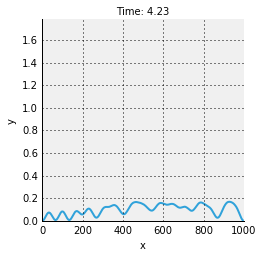
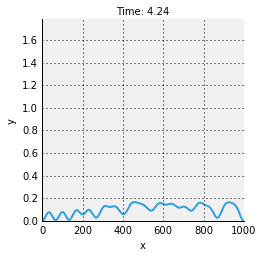
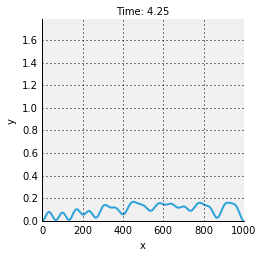
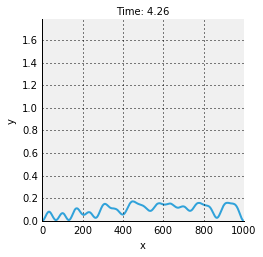
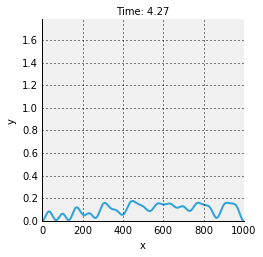
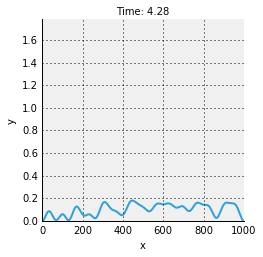
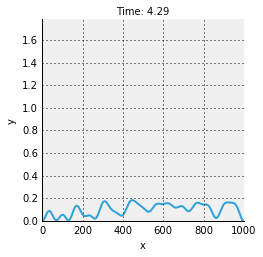
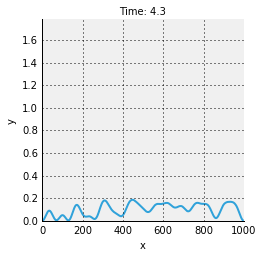
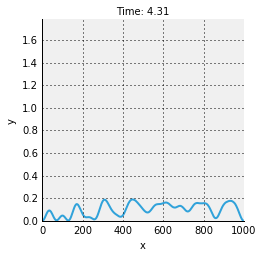
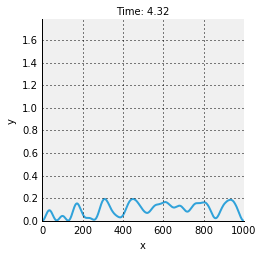
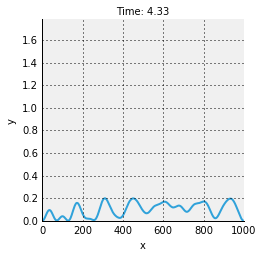
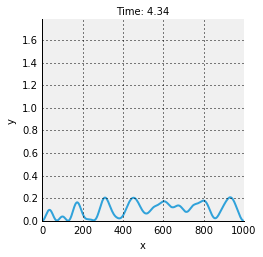
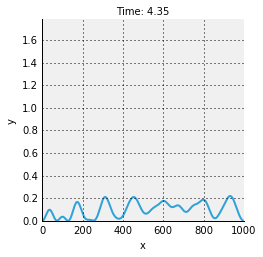
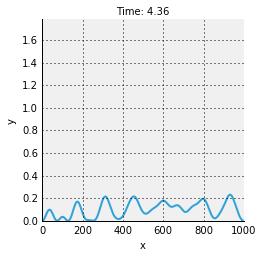
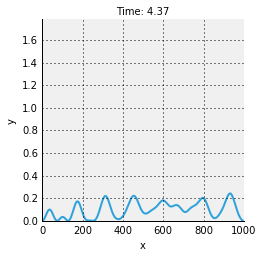
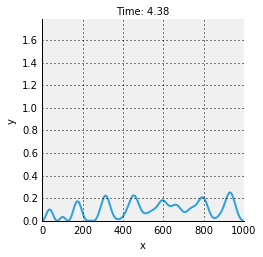
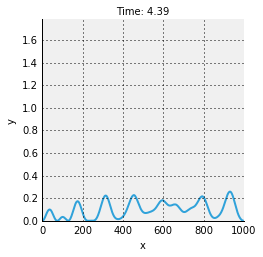
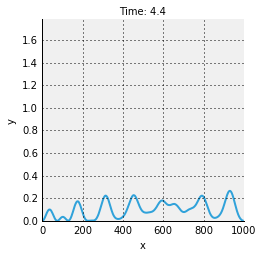
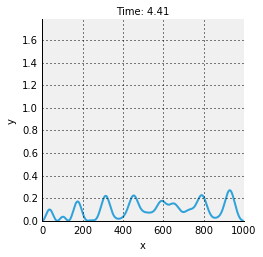
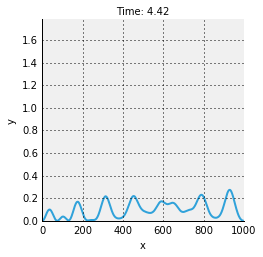
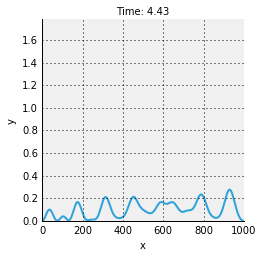
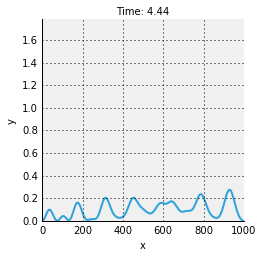
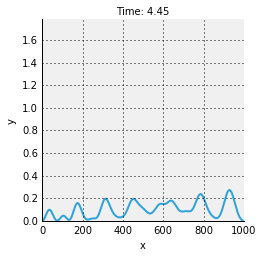
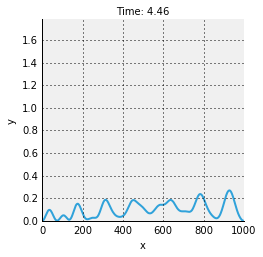
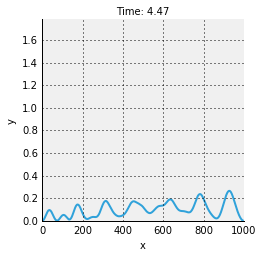
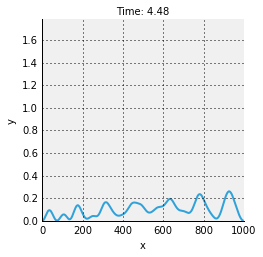
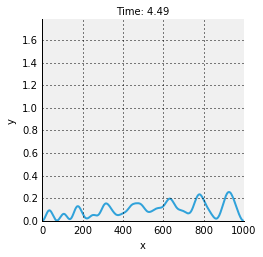
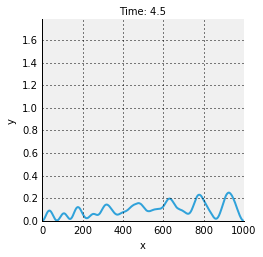
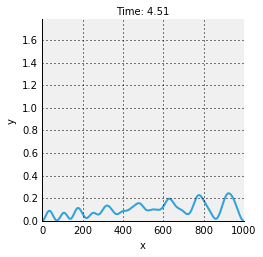
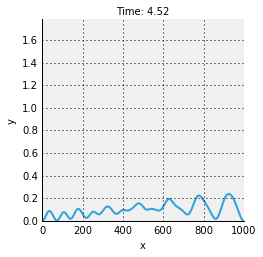
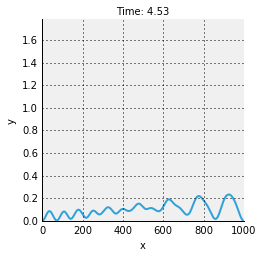
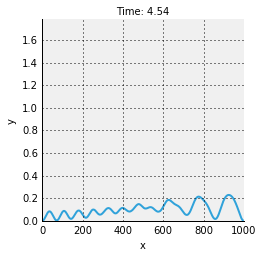
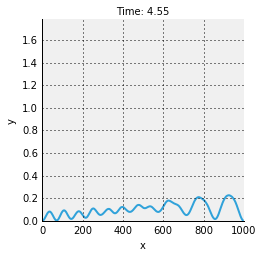
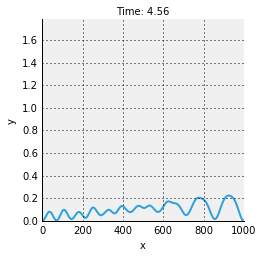
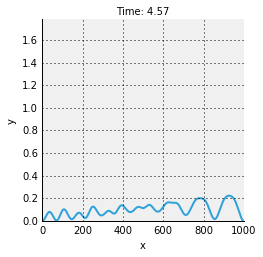
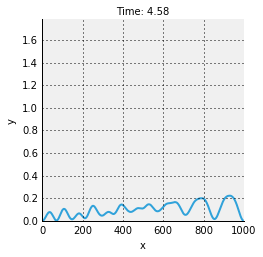
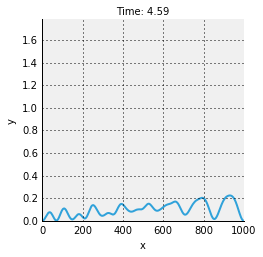
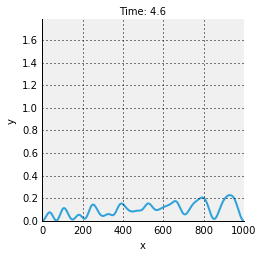
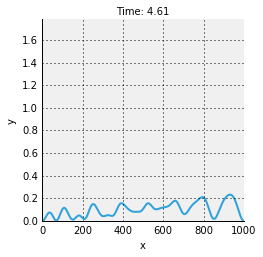
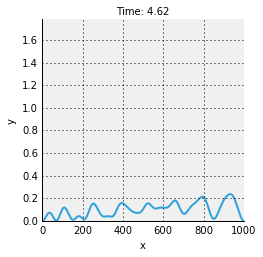
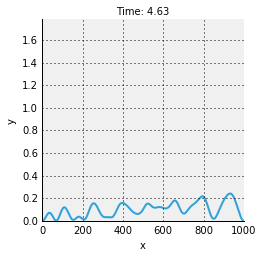
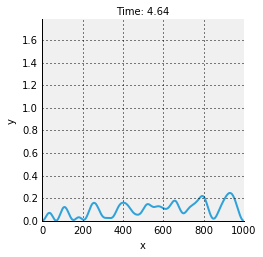
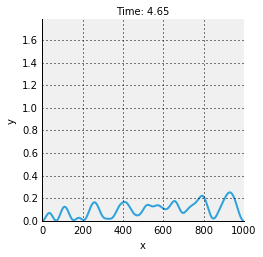
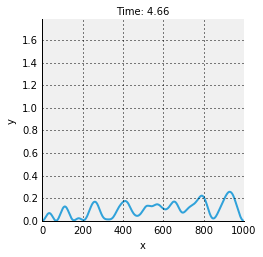
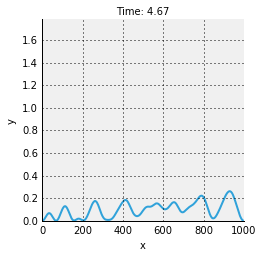
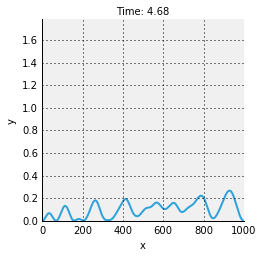
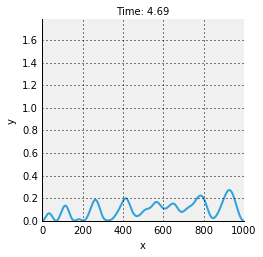
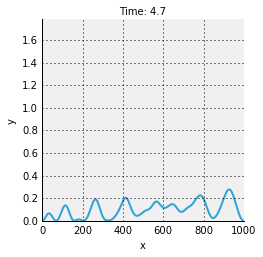
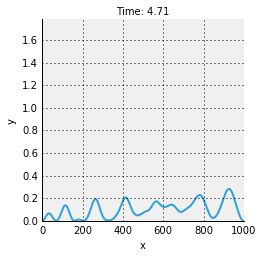
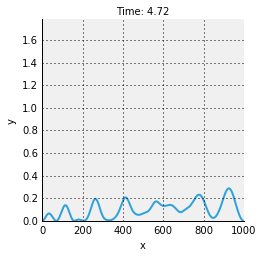
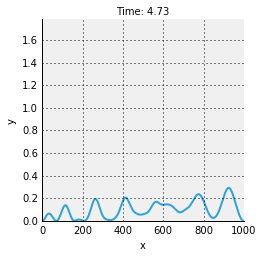
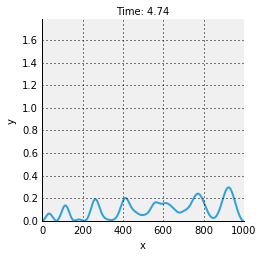
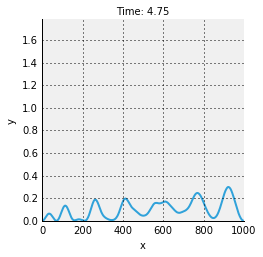
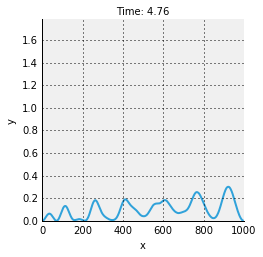
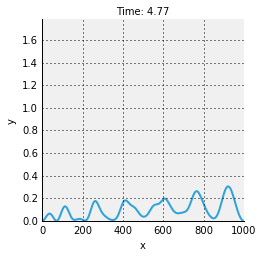
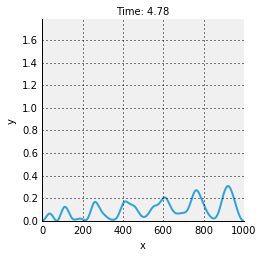
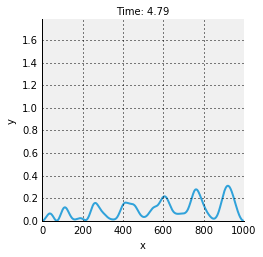
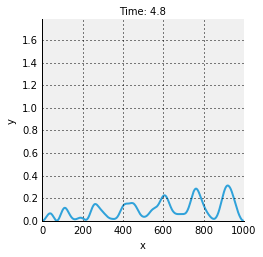
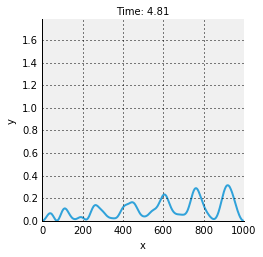
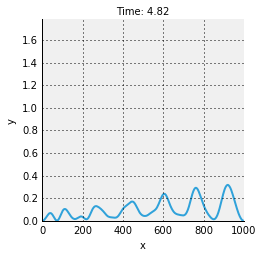
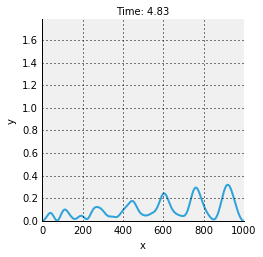
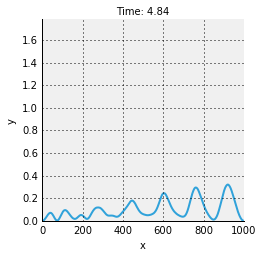
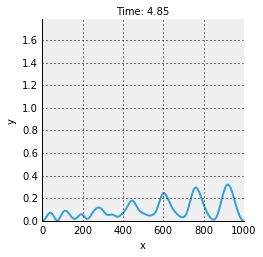
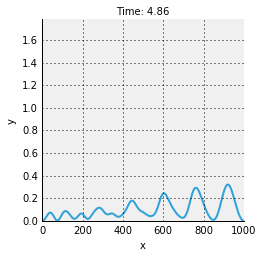
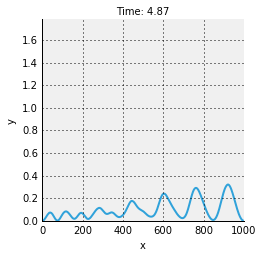
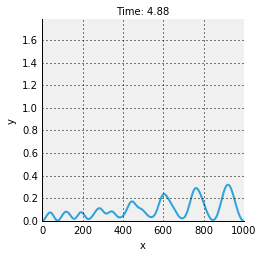
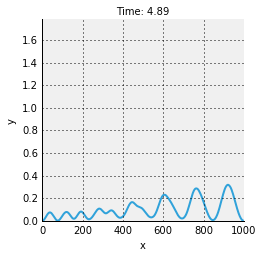
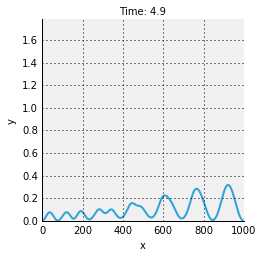
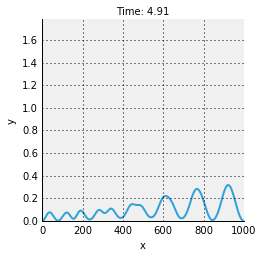
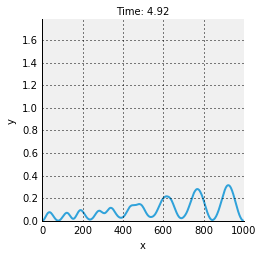
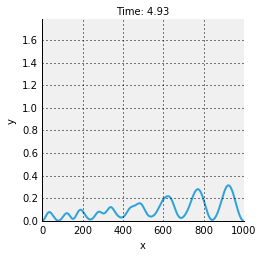
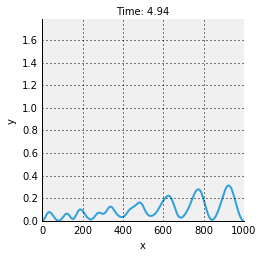
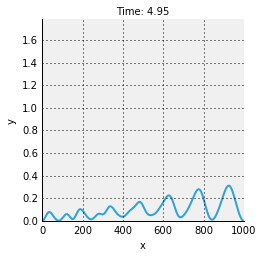
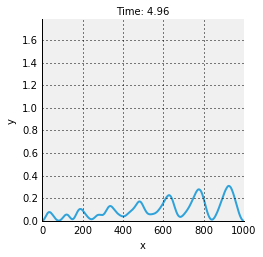
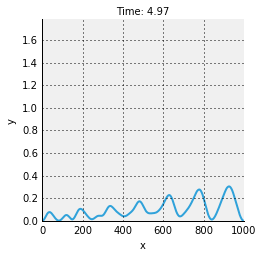
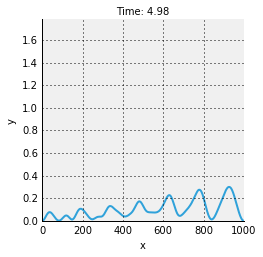
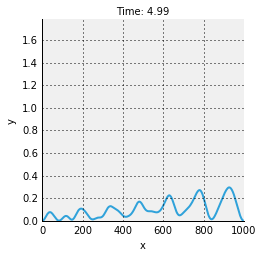

In [513]:
%output holomap='scrubber'
hv.HoloMap([(
            i*dt, hv.Curve(np.abs(psi[:, i])**2)) # * hv.Curve(V))
            for i in range(int(T/dt))], kdims = ["Time"])